In [1]:
import getpass

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics

import sklearn

import imblearn

import webdav4.client

import io

import collections

import types

import warnings

import colorsys

import IPython.display

import sklearn

import xgboost

#from imblearn.over_sampling import SMOTE
import imblearn

In [2]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [3]:
def checkfornan(x):
    return [col for col in x.columns if x[col].isna().any()]


In [4]:
client=webdav4.client.Client(base_url='https://webdav.critchley.biz', auth=(input('User:'), getpass.getpass('Password:')))

User:john
Password:········


In [5]:
df_ls=pd.DataFrame(client.ls('/aws/H'))

In [6]:
df_ls.sort_values('created')

,name,href,content_length,created,modified,content_language,content_type,etag,type,display_name
2,aws/H/Sample_Submission_(1).csv,/aws/H/Sample_Submission_(1).csv,468235,2023-12-23 22:16:18+00:00,2023-12-18 21:09:01+00:00,None,text/csv,"""7250b-60ccf28b69457""",file,None
3,aws/H/Data_Dictionary_(1)_(1)_(1)_(3).csv,/aws/H/Data_Dictionary_(1)_(1)_(1)_(3).csv,1337,2023-12-23 22:16:18+00:00,2023-12-18 21:09:41+00:00,None,text/csv,"""539-60ccf2b1edabe""",file,None
0,aws/H/Test_set_(1).csv,/aws/H/Test_set_(1).csv,6096186,2023-12-23 22:16:21+00:00,2023-12-18 21:08:23+00:00,None,text/csv,"""5d053a-60ccf2673fdf5""",file,None
1,aws/H/Train_set_(1).csv,/aws/H/Train_set_(1).csv,14415377,2023-12-23 22:16:27+00:00,2023-12-18 21:07:50+00:00,None,text/csv,"""dbf611-60ccf2488fc75""",file,None


In [7]:
f=types.SimpleNamespace()
df=types.SimpleNamespace()

In [8]:
f.test=io.BytesIO()
client.download_fileobj( df_ls['href'][0], f.test)
f.test.seek(0)
df.test=pd.read_csv(f.test, low_memory=False)
print(df.test.shape)
f.train=io.BytesIO()
client.download_fileobj( df_ls['href'][1], f.train)
f.train.seek(0)
df.train=pd.read_csv(f.train, low_memory=False)
print(df.train.shape)
#del f

(39933, 22)
(93174, 23)


In [9]:
f.test.seek(0)
df.test=pd.read_csv(f.test, low_memory=False)
print(df.test.shape)
f.train.seek(0)
df.train=pd.read_csv(f.train, low_memory=False)
print(df.train.shape)

(39933, 22)
(93174, 23)


In [10]:
df.test

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.00,Not Verified,...,14.62,0.00,0.00,22156,30.00,2290.24,INDIVIDUAL,87.00,128098.00,25800.00
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.00,Not Verified,...,11.38,0.00,0.00,7592,14.00,202.68,INDIVIDUAL,13.00,269396.00,23600.00
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.00,Verified,...,28.15,0.00,1.00,17983,19.00,1166.24,INDIVIDUAL,30.00,220135.00,34100.00
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.00,Source Verified,...,34.32,0.00,0.00,12262,18.00,635.06,INDIVIDUAL,35.00,39436.00,21700.00
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.00,Source Verified,...,26.74,1.00,0.00,8251,11.00,1232.84,INDIVIDUAL,31.00,52764.00,12000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,3 years,8.18,B,B1,10+ years,MORTGAGE,65000.00,Source Verified,...,13.09,0.00,5.00,6731,24.00,187.27,INDIVIDUAL,26.00,14422.00,26100.00
39929,59742362,1800,3 years,11.53,B,B5,6-10 years,MORTGAGE,55000.00,Source Verified,...,25.44,0.00,1.00,11092,38.00,81.24,INDIVIDUAL,26.00,243469.00,29200.00
39930,72657145,15200,3 years,13.44,C,C3,10+ years,MORTGAGE,78000.00,Not Verified,...,19.40,0.00,0.00,19688,26.00,0.00,INDIVIDUAL,NaN,145370.00,45400.00
39931,15220189,14425,5 years,18.92,D,D4,<5 Years,MORTGAGE,38000.00,Not Verified,...,17.40,0.00,1.00,10805,29.00,4268.80,INDIVIDUAL,96.00,106449.00,19700.00


In [11]:
df.train

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.00,Not Verified,...,0.00,0.00,39519,20.00,59.60,INDIVIDUAL,4.00,95493.00,84100.00,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.00,Verified,...,0.00,1.00,9783,24.00,3348.25,INDIVIDUAL,95.00,185433.00,13500.00,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.00,Source Verified,...,2.00,0.00,13641,27.00,276.69,INDIVIDUAL,13.00,180519.00,19300.00,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.00,Verified,...,0.00,0.00,35020,35.00,1106.72,INDIVIDUAL,17.00,183208.00,55400.00,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.00,Source Verified,...,0.00,0.00,23990,26.00,725.29,INDIVIDUAL,39.00,23990.00,81300.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.00,Not Verified,...,0.00,0.00,7924,38.00,55.34,INDIVIDUAL,13.00,64635.00,47600.00,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.00,Not Verified,...,0.00,0.00,10174,24.00,299.67,INDIVIDUAL,161.00,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.50,Source Verified,...,1.00,0.00,5391,25.00,1150.58,INDIVIDUAL,65.00,94596.00,6500.00,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.00,Verified,...,0.00,0.00,24609,45.00,5764.58,INDIVIDUAL,56.00,33759.00,34900.00,1


In [12]:
dep_var='default'

In [13]:
df.all=pd.concat((df.test,df.train.drop('default', axis=1))).reset_index( drop=True)
df.all

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.00,Not Verified,...,14.62,0.00,0.00,22156,30.00,2290.24,INDIVIDUAL,87.00,128098.00,25800.00
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.00,Not Verified,...,11.38,0.00,0.00,7592,14.00,202.68,INDIVIDUAL,13.00,269396.00,23600.00
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.00,Verified,...,28.15,0.00,1.00,17983,19.00,1166.24,INDIVIDUAL,30.00,220135.00,34100.00
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.00,Source Verified,...,34.32,0.00,0.00,12262,18.00,635.06,INDIVIDUAL,35.00,39436.00,21700.00
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.00,Source Verified,...,26.74,1.00,0.00,8251,11.00,1232.84,INDIVIDUAL,31.00,52764.00,12000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133102,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.00,Not Verified,...,17.11,0.00,0.00,7924,38.00,55.34,INDIVIDUAL,13.00,64635.00,47600.00
133103,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.00,Not Verified,...,22.64,0.00,0.00,10174,24.00,299.67,INDIVIDUAL,161.00,NaN,NaN
133104,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.50,Source Verified,...,13.04,1.00,0.00,5391,25.00,1150.58,INDIVIDUAL,65.00,94596.00,6500.00
133105,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.00,Verified,...,17.22,0.00,0.00,24609,45.00,5764.58,INDIVIDUAL,56.00,33759.00,34900.00


In [14]:
pd_summary=pd.DataFrame(dict(nunique=df.all.nunique()*100.0/len(df.all),hasna=df.all.isna().sum()*100.0/len(df.all)))
pd_summary

,nunique,hasna
ID,100.00,0.00
loan_amnt,1.01,0.00
loan_term,0.00,0.00
interest_rate,0.38,0.00
loan_grade,0.01,0.00
loan_subgrade,0.03,0.00
job_experience,0.00,5.10
home_ownership,0.00,0.00
annual_income,8.64,0.00
income_verification_status,0.00,0.00


In [15]:
renames={'interest_receive':'interest_received', 
         'loan_amnt':'loan_amount',
         'delinq_2yrs':'delinquent_for_2y',
         'total_acc': 'credit_lines',
         'public_records': 'legal_cases',
         'last_week_pay': 'months_paid'
        }
for dfi, dfd in df.__dict__.items():
    dfd.rename({oldname:newname for oldname,newname in renames.items() if oldname in dfd.columns and newname not in dfd.columns}, axis=1, inplace=True)

In [16]:
criteria=(df.all.nunique()>10)

In [17]:
df.test[criteria.index[criteria]]

,ID,loan_amount,interest_rate,loan_subgrade,annual_income,state_code,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,total_current_balance,total_revolving_limit
0,4855329,12000,15.31,C2,73400.00,CA,14.62,0.00,0.00,22156,30.00,2290.24,87.00,128098.00,25800.00
1,66862420,12000,7.26,A4,105000.00,VA,11.38,0.00,0.00,7592,14.00,202.68,13.00,269396.00,23600.00
2,3637416,15000,14.33,C1,50000.00,TX,28.15,0.00,1.00,17983,19.00,1166.24,30.00,220135.00,34100.00
3,53682249,12000,9.99,B3,37000.00,NJ,34.32,0.00,0.00,12262,18.00,635.06,35.00,39436.00,21700.00
4,53937165,20150,11.53,B5,75000.00,CA,26.74,1.00,0.00,8251,11.00,1232.84,31.00,52764.00,12000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,8.18,B1,65000.00,MI,13.09,0.00,5.00,6731,24.00,187.27,26.00,14422.00,26100.00
39929,59742362,1800,11.53,B5,55000.00,AZ,25.44,0.00,1.00,11092,38.00,81.24,26.00,243469.00,29200.00
39930,72657145,15200,13.44,C3,78000.00,TX,19.40,0.00,0.00,19688,26.00,0.00,NaN,145370.00,45400.00
39931,15220189,14425,18.92,D4,38000.00,IN,17.40,0.00,1.00,10805,29.00,4268.80,96.00,106449.00,19700.00


In [18]:
df.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amount                 93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinquent_for_2y           931

In [19]:
df.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amount                 39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinquent_for_2y           399

In [20]:
df.all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133107 entries, 0 to 133106
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          133107 non-null  int64  
 1   loan_amount                 133107 non-null  int64  
 2   loan_term                   133107 non-null  object 
 3   interest_rate               133107 non-null  float64
 4   loan_grade                  133107 non-null  object 
 5   loan_subgrade               133107 non-null  object 
 6   job_experience              126316 non-null  object 
 7   home_ownership              133107 non-null  object 
 8   annual_income               133106 non-null  float64
 9   income_verification_status  133107 non-null  object 
 10  loan_purpose                133107 non-null  object 
 11  state_code                  133107 non-null  object 
 12  debt_to_income              133107 non-null  float64
 13  delinquent_for

In [21]:
d=df.train.drop('ID', axis=1).copy()

In [22]:
d

,loan_amount,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,application_type,months_paid,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.00,Not Verified,debt_consolidation,...,0.00,0.00,39519,20.00,59.60,INDIVIDUAL,4.00,95493.00,84100.00,0
1,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.00,Verified,debt_consolidation,...,0.00,1.00,9783,24.00,3348.25,INDIVIDUAL,95.00,185433.00,13500.00,0
2,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.00,Source Verified,debt_consolidation,...,2.00,0.00,13641,27.00,276.69,INDIVIDUAL,13.00,180519.00,19300.00,0
3,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.00,Verified,debt_consolidation,...,0.00,0.00,35020,35.00,1106.72,INDIVIDUAL,17.00,183208.00,55400.00,0
4,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.00,Source Verified,credit_card,...,0.00,0.00,23990,26.00,725.29,INDIVIDUAL,39.00,23990.00,81300.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.00,Not Verified,debt_consolidation,...,0.00,0.00,7924,38.00,55.34,INDIVIDUAL,13.00,64635.00,47600.00,0
93170,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.00,Not Verified,other,...,0.00,0.00,10174,24.00,299.67,INDIVIDUAL,161.00,NaN,NaN,1
93171,8000,3 years,13.98,C,C3,10+ years,RENT,148531.50,Source Verified,credit_card,...,1.00,0.00,5391,25.00,1150.58,INDIVIDUAL,65.00,94596.00,6500.00,0
93172,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.00,Verified,debt_consolidation,...,0.00,0.00,24609,45.00,5764.58,INDIVIDUAL,56.00,33759.00,34900.00,1


In [23]:
d['loan_term'].value_counts().sort_values()

loan_term
5 years    27963
3 years    65211
Name: count, dtype: int64

In [24]:
del d

In [25]:
Statistics = collections.namedtuple('Statistics', ['mean', 'median', 'percentile_25', 'percentile_75'])
def stats(data):
    return Statistics(
        data.mean(),
        data.median(),
        np.percentile(data, 25),
        np.percentile(data, 75)
    )

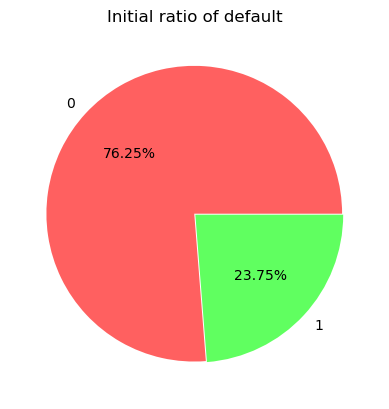

In [26]:
counts=df.train[dep_var].value_counts()
plt.title(f'Initial ratio of {dep_var}')
plt.pie(counts, labels=counts.index, autopct=lambda x:f'{x:.2f}%', colors=['#ff6060','#60ff60'], explode=[0.005,.005])
plt.show()

In [27]:
def mkjumptable(grp, labels):
    "Make an indedx with links to various items, params are the index name and the label."
    htmls=[f'<h2><a id="{grp}_index"></a>Go to:</h2>',
        '<ul>'
    ]
    for colname in labels:
        if colname in {'ID'}: continue
        htmls.append(f'<li><a href="#{colname}_{grp}">{colname}</a></li>')
    htmls.append('</ul>')
    IPython.display.display(IPython.display.HTML('\n'.join(htmls)))
def placelabel(grp, label):
    "Target label for index, the params are the index name and the label."
    html=IPython.display.HTML(f'<a id="{label}_{grp}" href="#{grp}_index" style="text-decoration:none">🠝</a><h2>{label}</h2>')
    IPython.display.display(html)

LargeNumeric


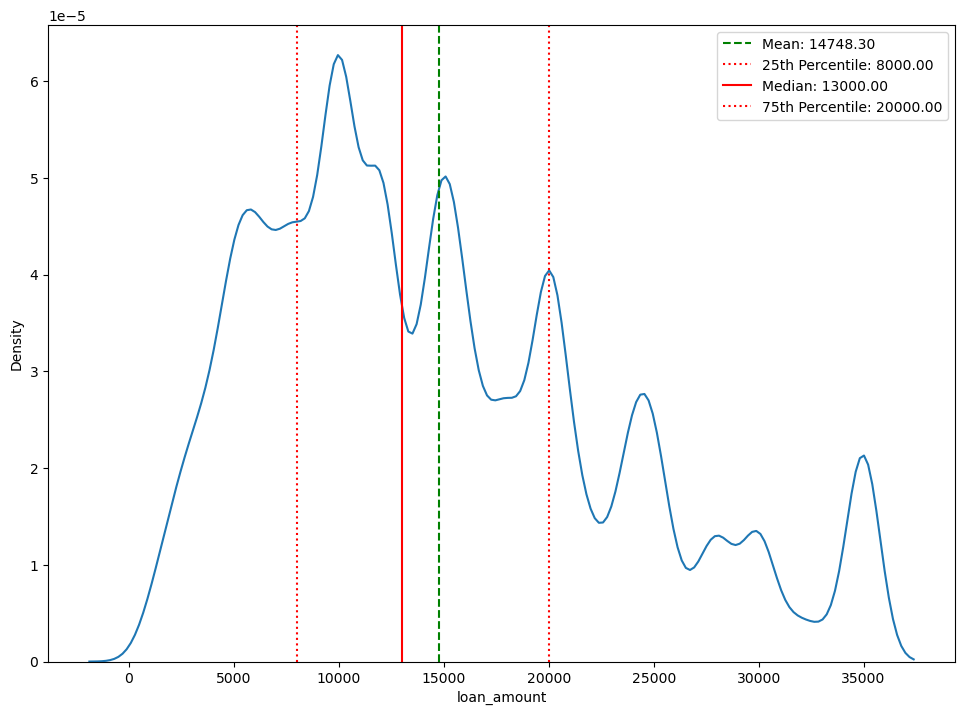

Categorical
loan_term
3 years    93321
5 years    39786
Name: count, dtype: int64


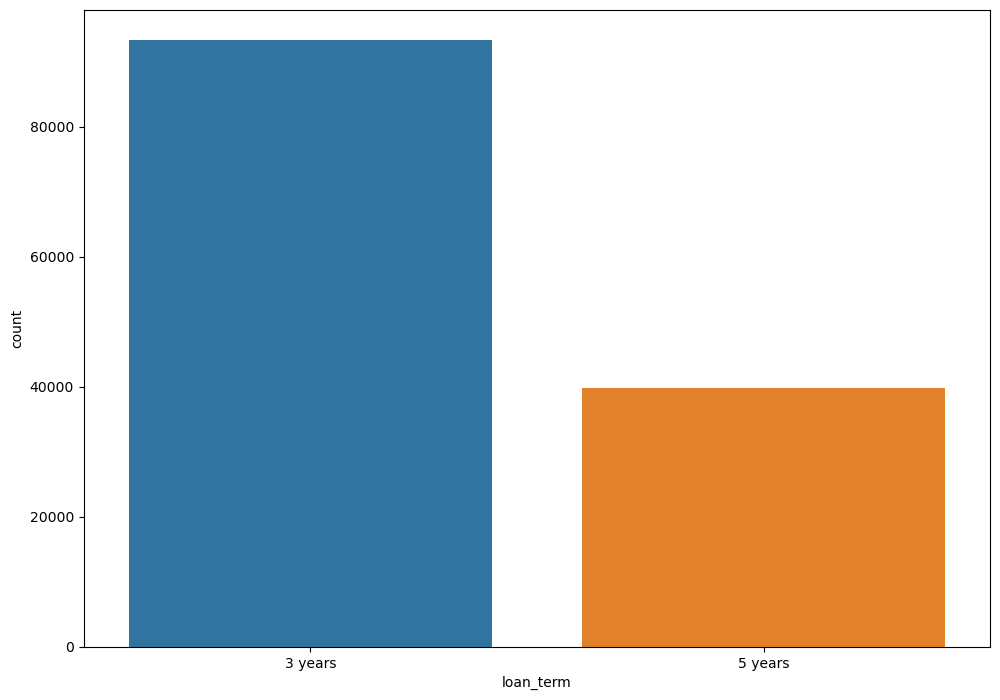

LargeNumeric


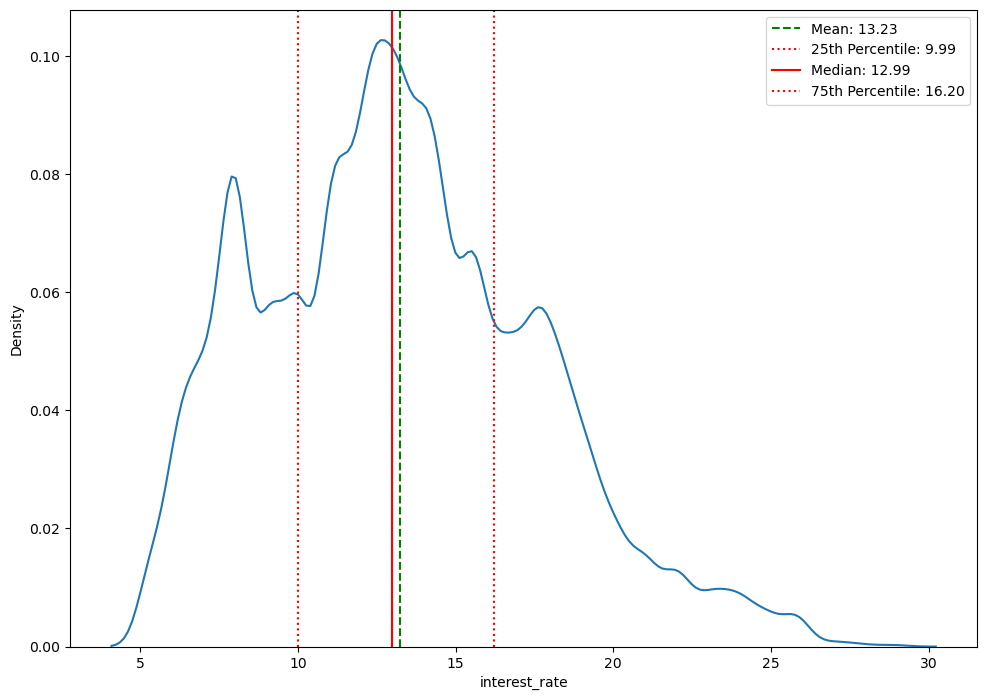

Categorical
loan_grade
B    38416
C    36735
A    22298
D    20952
E    10536
F     3374
G      796
Name: count, dtype: int64


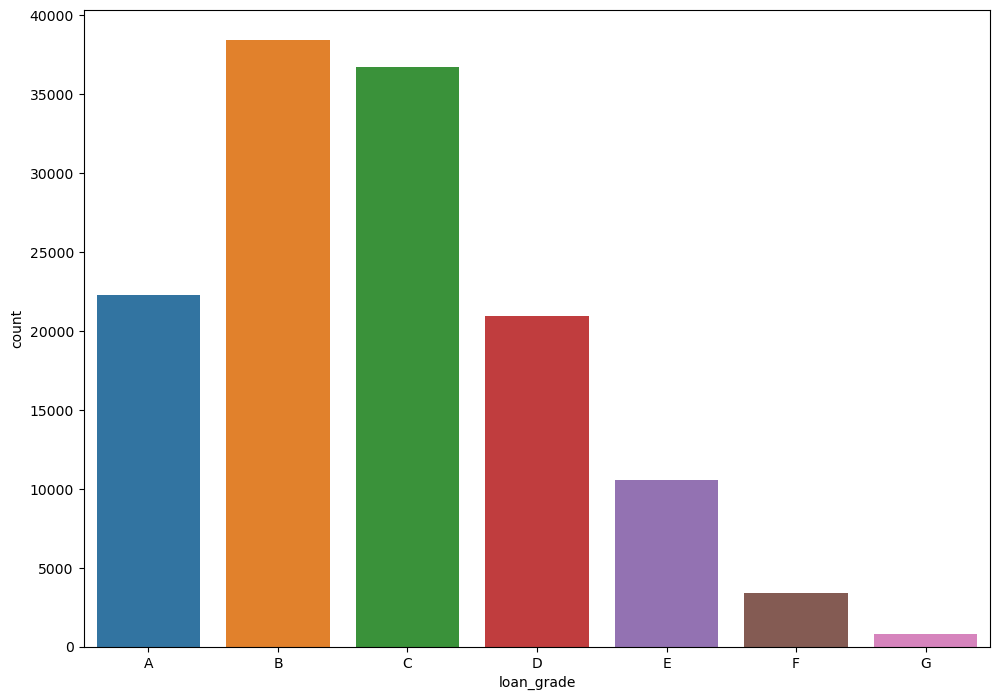

Categorical
loan_subgrade
B3    8426
B4    8398
C1    7879
C2    7850
C3    7490
B2    7375
B5    7342
C4    7266
B1    6875
A5    6792
C5    6250
D1    5292
A4    5190
D2    4612
D3    3934
D4    3858
A3    3524
A1    3444
A2    3348
D5    3256
E1    2727
E2    2491
E3    2165
E4    1747
E5    1406
F1    1057
F2     799
F3     660
F4     502
F5     356
G1     245
G2     218
G3     151
G5      97
G4      85
Name: count, dtype: int64


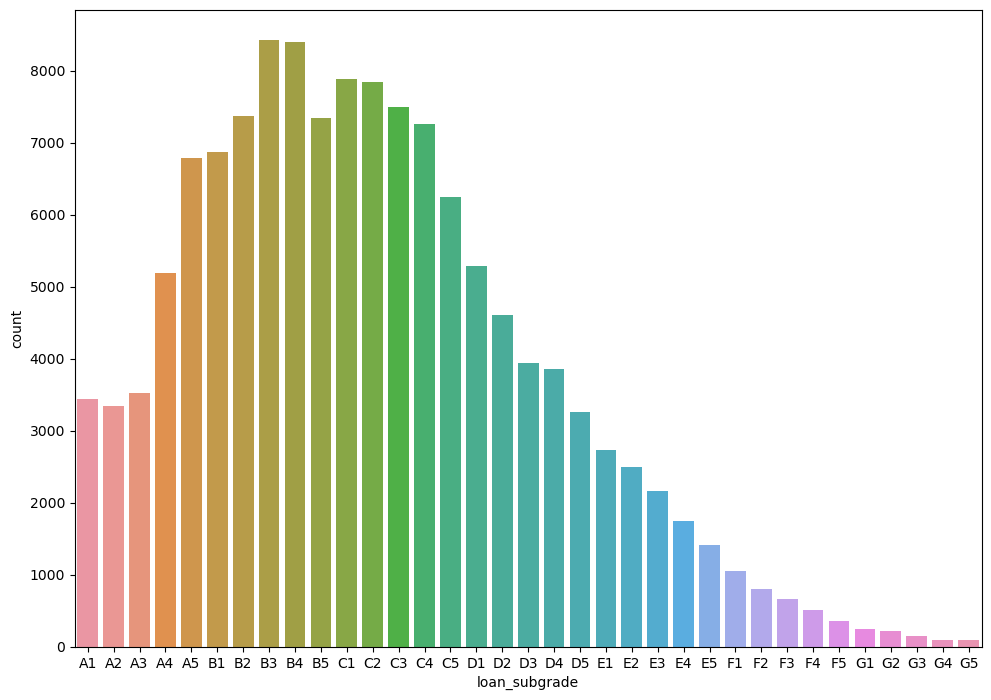

Categorical
job_experience
<5 Years      57900
10+ years     43508
6-10 years    24908
Unknown        6791
Name: count, dtype: int64
NaN: 6791


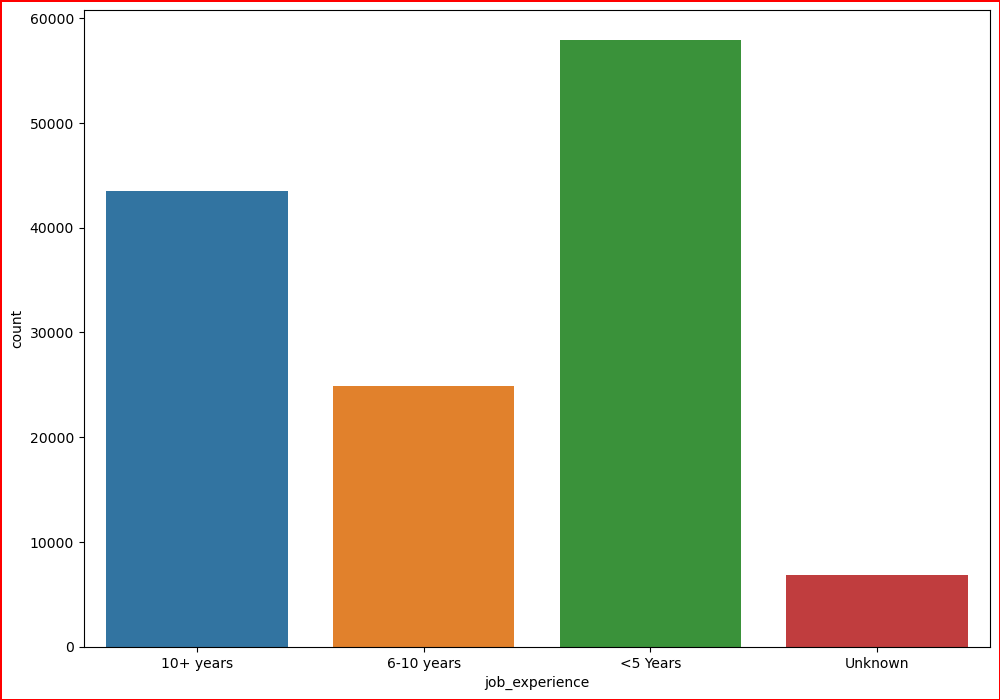

Categorical
home_ownership
MORTGAGE    66453
RENT        53387
OWN         13233
OTHER          24
NONE           10
Name: count, dtype: int64


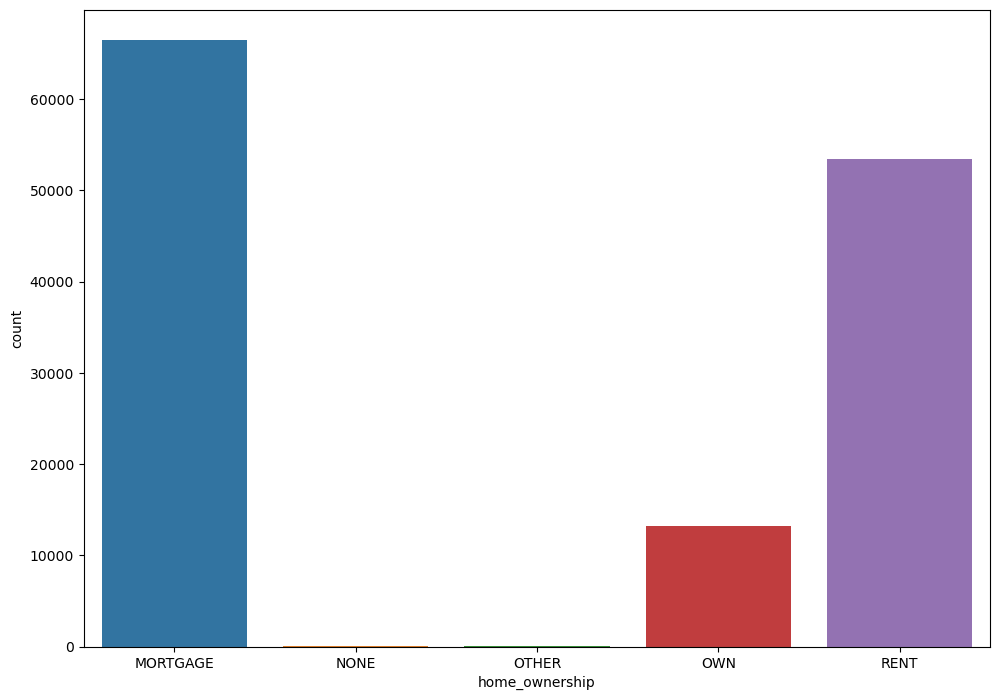

LargeNumeric
NaN: 1


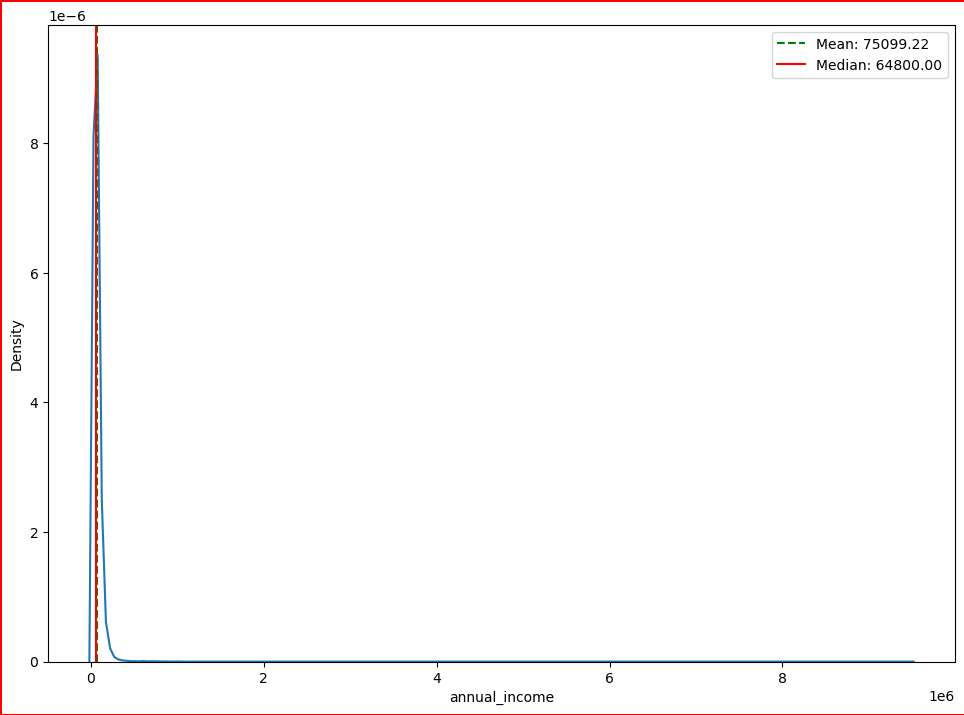

Categorical
income_verification_status
Source Verified    49267
Verified           43645
Not Verified       40195
Name: count, dtype: int64


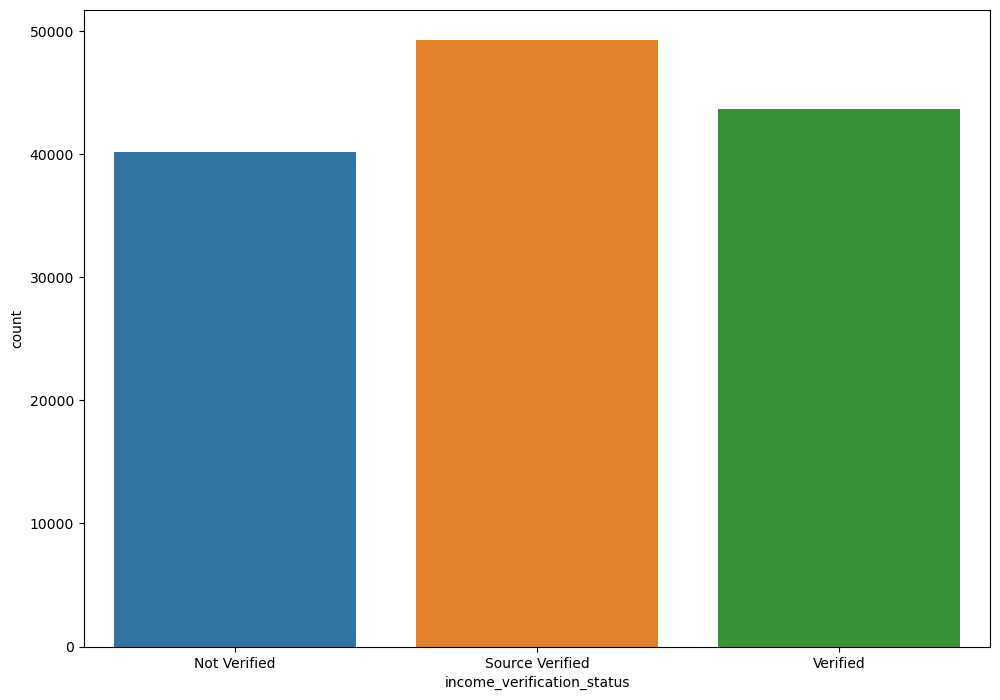

Categorical
loan_purpose
debt_consolidation    78714
credit_card           30954
other                 15664
home_improvement       7775
Name: count, dtype: int64


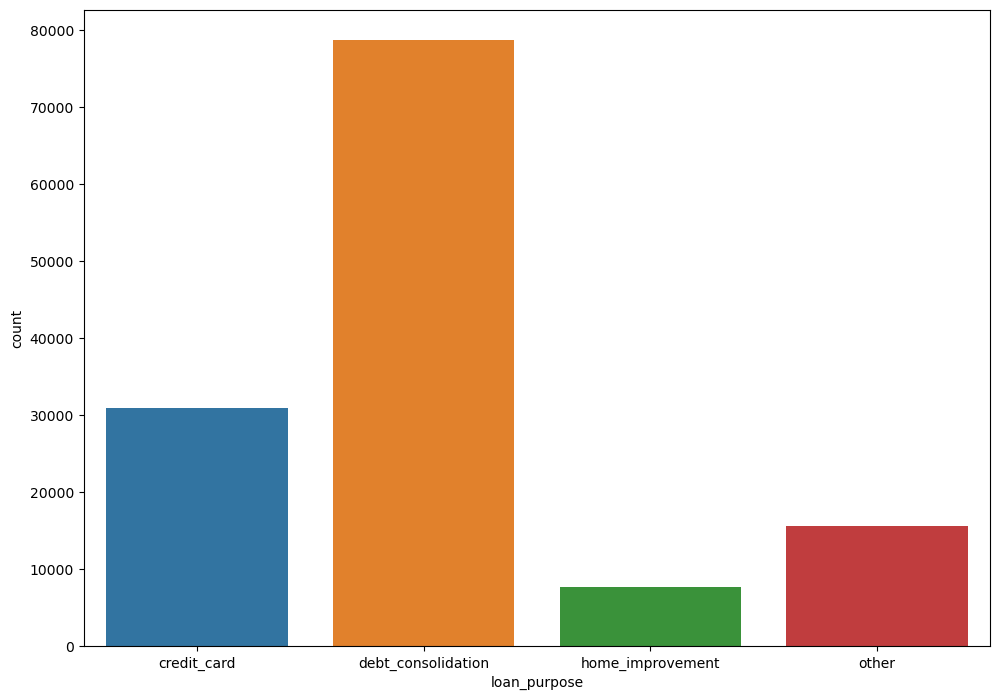

Categorical
state_code
CA    19675
NY    11191
TX    10630
FL     9074
IL     5252
NJ     4977
PA     4712
OH     4476
GA     4349
VA     3987
NC     3732
MI     3416
MD     3214
MA     3177
AZ     3032
WA     2946
CO     2793
MN     2346
MO     2135
IN     1997
CT     1989
TN     1922
NV     1870
AL     1713
WI     1680
SC     1602
OR     1581
LA     1570
KY     1347
OK     1216
KS     1146
AR     1009
UT      938
NM      721
WV      673
HI      660
NH      659
RI      568
MS      547
DC      370
DE      369
MT      366
AK      331
WY      294
SD      263
VT      262
NE      184
ME       79
ND       65
ID        2
Name: count, dtype: int64


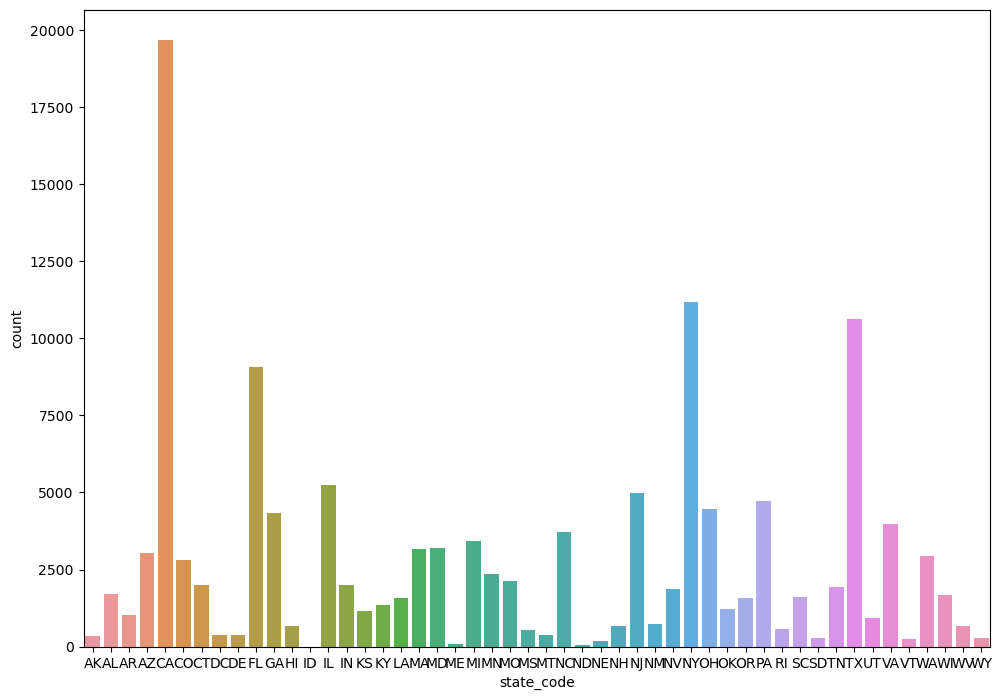

LargeNumeric


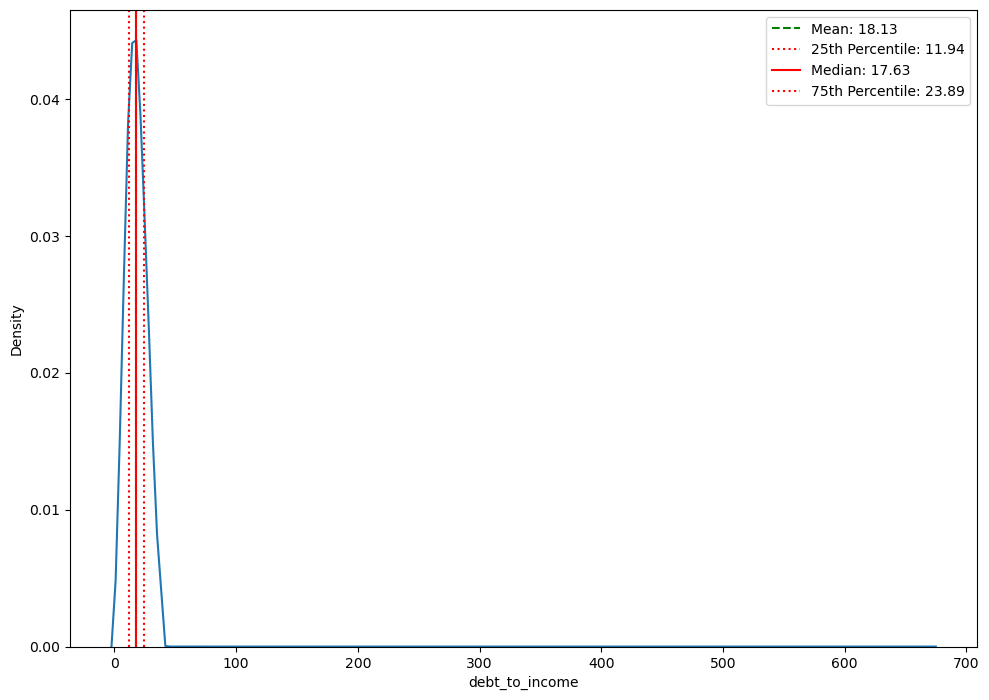

delinquent_for_2y
0.00     107638
1.00      16846
2.00       5019
3.00       1869
4.00        786
5.00        396
6.00        213
7.00        113
8.00         78
9.00         43
10.00        28
12.00        24
11.00        17
13.00        12
14.00        11
17.00         3
15.00         3
18.00         3
16.00         2
19.00         1
21.00         1
22.00         1
Name: count, dtype: int64
NaN: 3


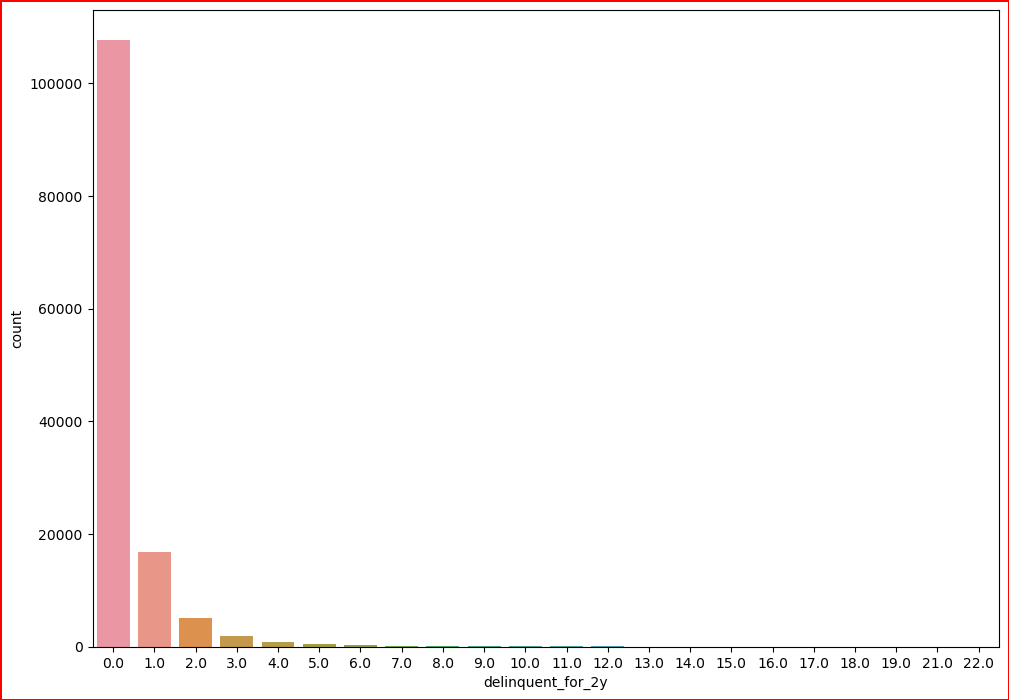

legal_cases
0.00     112785
1.00      16997
2.00       2164
3.00        665
4.00        244
5.00        112
6.00         73
7.00         26
8.00         15
9.00          9
10.00         7
11.00         4
12.00         2
21.00         1
23.00         1
13.00         1
49.00         1
Name: count, dtype: int64
NaN: 3


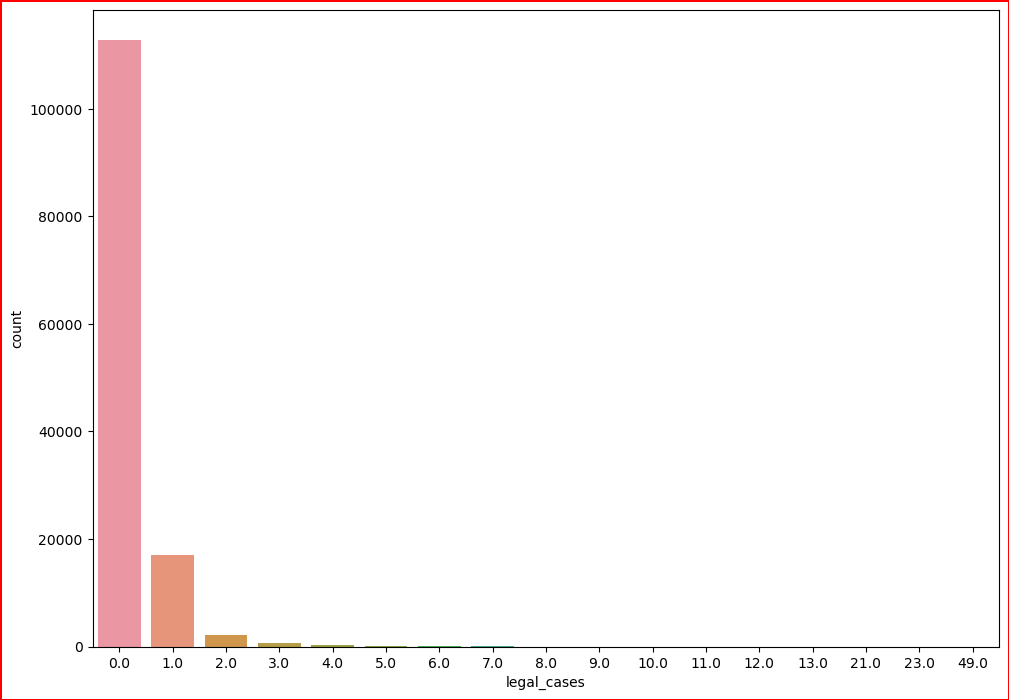

LargeNumeric


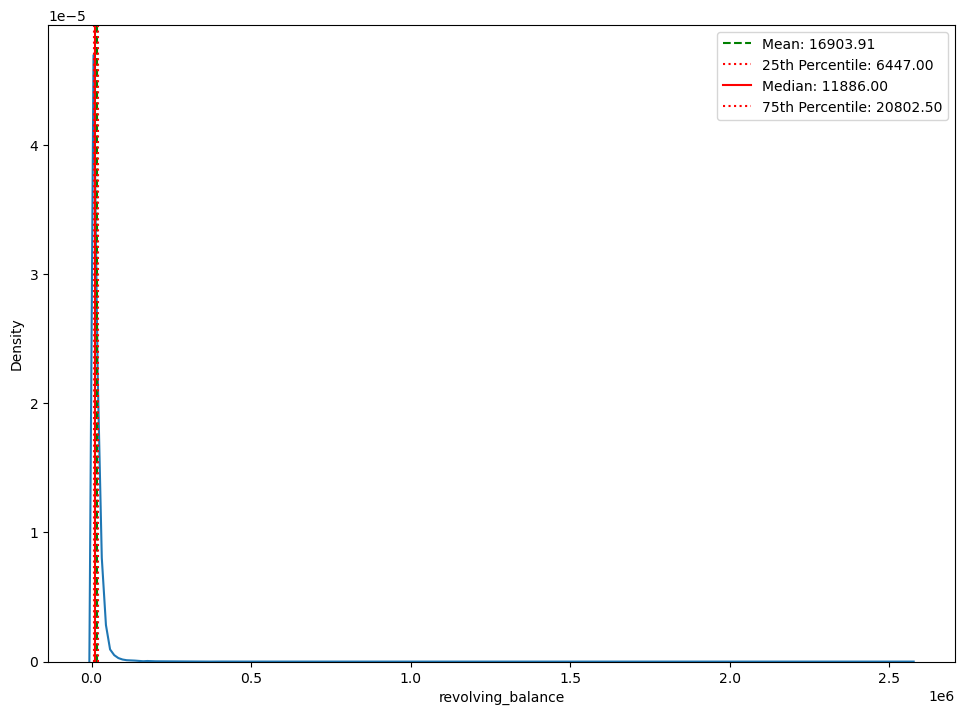

LargeNumeric
NaN: 3


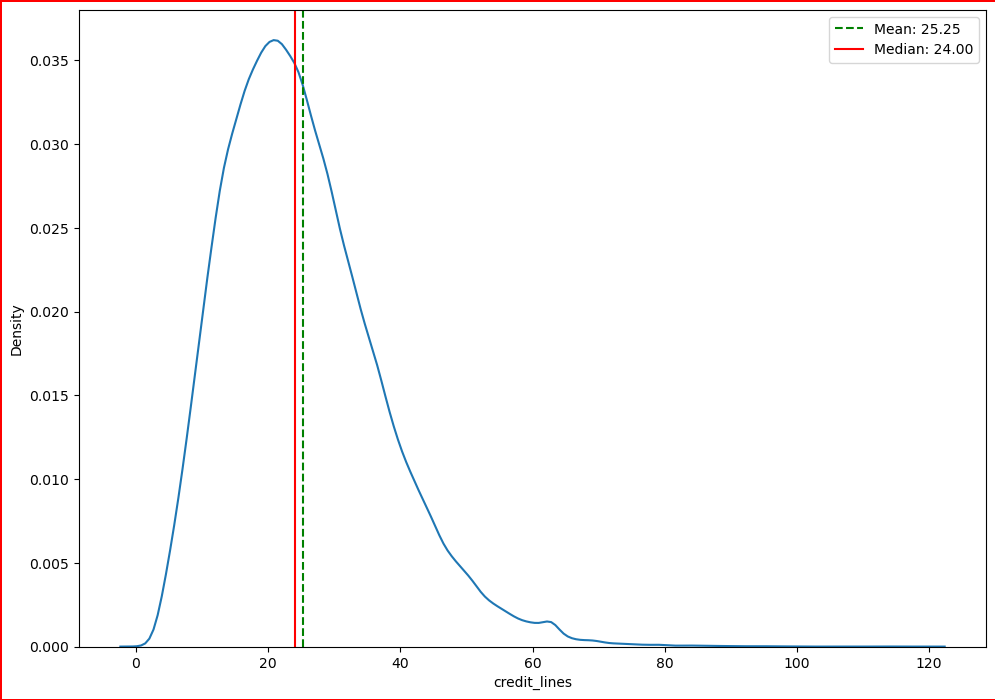

LargeNumeric


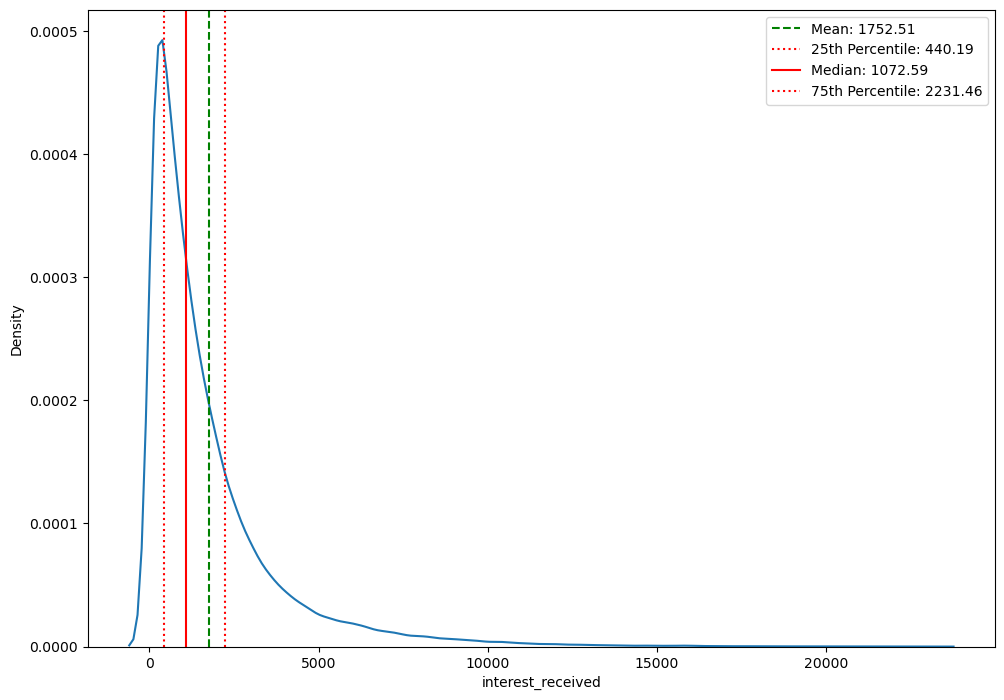

Categorical
application_type
INDIVIDUAL    133027
JOINT             80
Name: count, dtype: int64


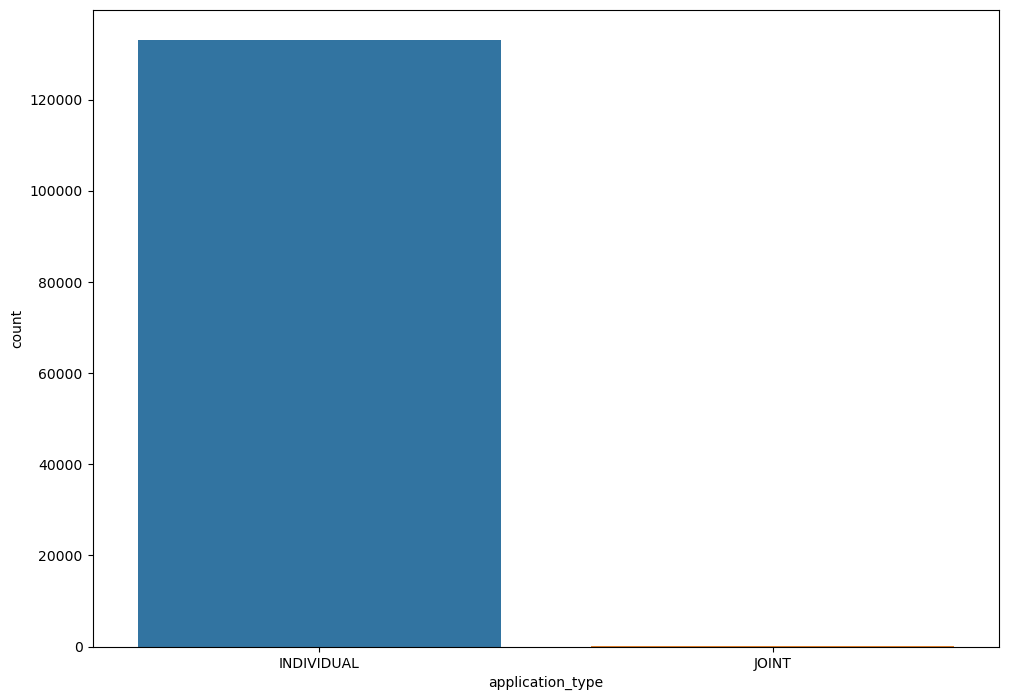

LargeNumeric
NaN: 2730


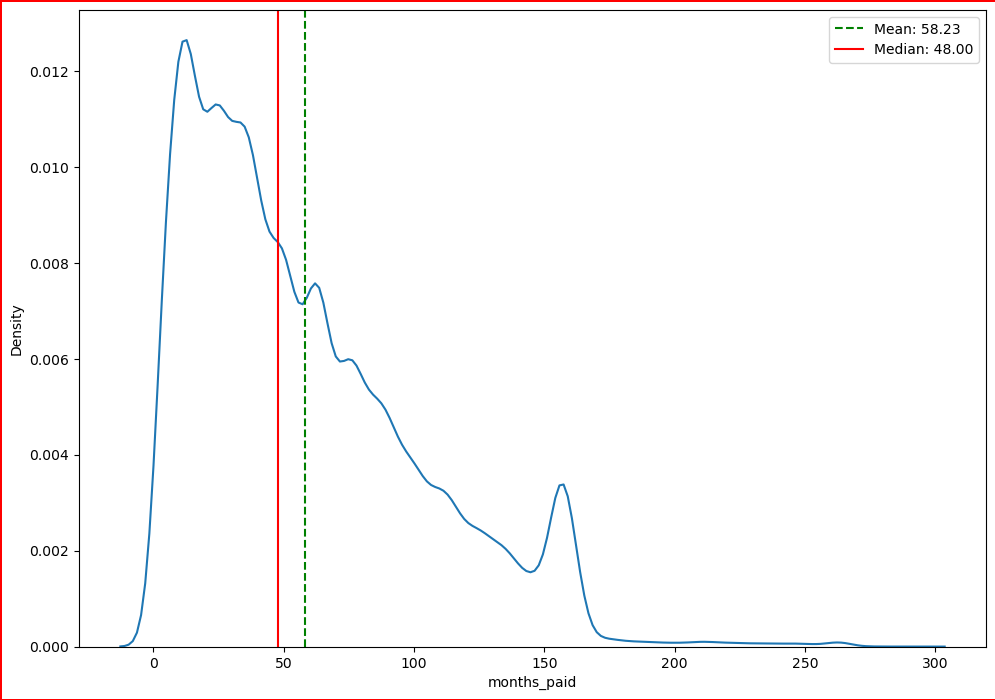

LargeNumeric
NaN: 10616


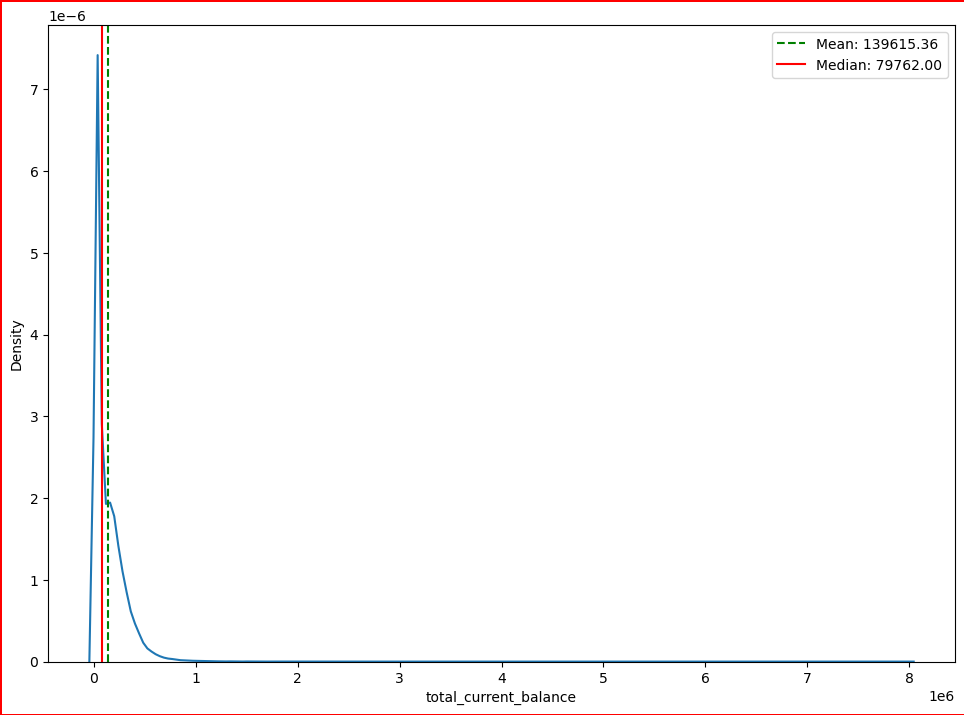

LargeNumeric
NaN: 10616


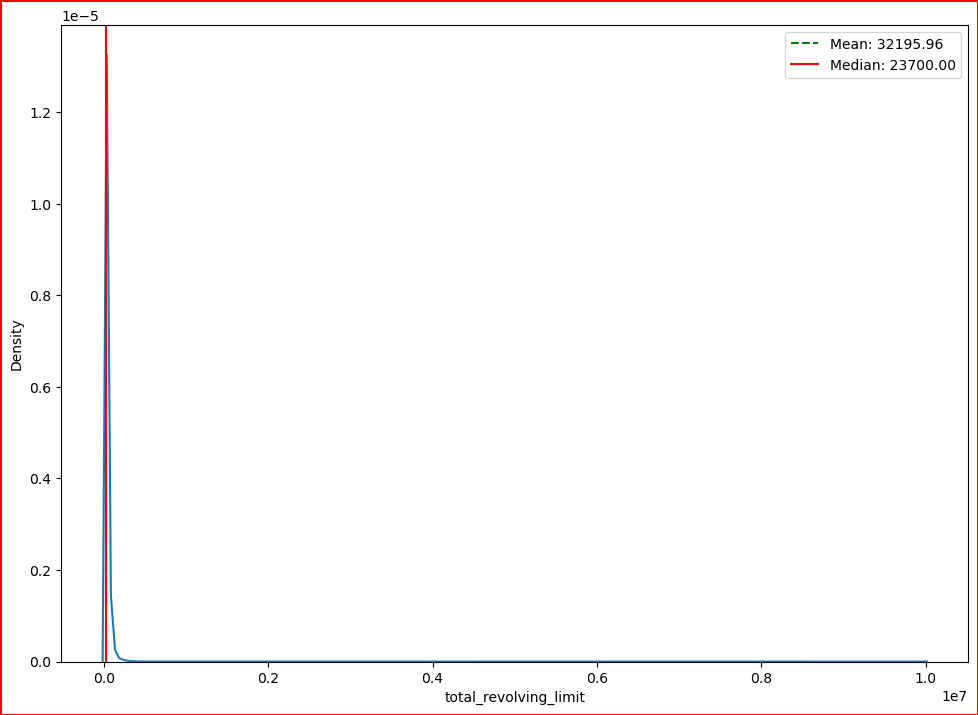

In [28]:
thechange=50
narep=0 
dims = (11.7, 8.27)

dfi=df.all
mkjumptable('plot', dfi.columns)

for colname in dfi.columns:
    if colname in {'ID'}: continue
    placelabel('plot', colname)
    col=dfi[colname]
    if col.nunique()<=thechange:
        if col.dtype.type == np.object_: 
            print("Categorical")
            c=col.fillna('Unknown').astype('category').value_counts()#.sort_values()
        else:
            c=col.fillna(narep).value_counts()#.sort_values(ascending=True)
        print(c)
        fig, ax = plt.subplots(figsize=dims)
#        ax.set_title(colname)
        sns.barplot(y=c, x=c.index, ax=ax)
    else:
        if col.nunique()>thechange:
            if col.dtype.type == np.object_: 
                print("XXXXXX")
                continue
            print('LargeNumeric')
            c=col.fillna(narep) if col.isna().all() else col
            s=stats(c)
            fig, ax = plt.subplots(figsize=dims)
#        ax.set_title(colname)
            sns.kdeplot(x=col, ax=ax)
            
            plt.axvline(s.mean, color='g', linestyle='--', label=f'Mean: {s.mean:.2f}')
            if not np.isnan(s.percentile_25):
                plt.axvline(s.percentile_25, color='r', linestyle=':', label=f'25th Percentile: {s.percentile_25:.2f}')
            plt.axvline(s.median, color='r', linestyle='-', label=f'Median: {s.median:.2f}')
            if not np.isnan(s.percentile_75):
                plt.axvline(s.percentile_75, color='r', linestyle=':', label=f'75th Percentile: {s.percentile_75:.2f}')
            plt.legend()
    if col.isna().any():
        fig.patch.set_edgecolor('red') # Put a red box around any which have NaNs
        fig.patch.set_linewidth(2)
        print("NaN:", col.isna().sum())
    plt.show()

In [29]:
Location = collections.namedtuple('Location', ['longitude', 'latitude'])
state_code = np.sort(df.all.state_code.unique()).tolist()
centroid_coords = [
    (-86.8287, 32.7794), (-152.2782, 64.0685), (-111.6602, 34.2744), (-92.4426, 34.8938), 
    (-119.4696, 37.1841), (-105.5478, 38.9972), (-72.7273, 41.6219), (-75.5050, 38.9896), 
    (-77.0147, 38.9101), (-82.4497, 28.6305), (-83.4426, 32.6415), (-156.3737, 20.2927), 
    (-114.6130, 44.3509), (-89.1965, 40.0417), (-86.2816, 39.8942), (-93.4960, 42.0751), 
    (-98.3804, 38.4937), (-85.3021, 37.5347), (-91.9968, 31.0689), (-69.2428, 45.3695), 
    (-76.7909, 39.0550), (-71.8083, 42.2596), (-85.4102, 44.3467), (-94.3053, 46.2807), 
    (-89.6678, 32.7364), (-92.4580, 38.3566), (-109.6333, 47.0527), (-99.6809, 41.5000), 
    (-116.6312, 39.3289), (-71.5811, 43.6805), (-74.6728, 40.1907), (-106.1126, 34.4071), 
    (-75.5268, 42.9538), (-79.3877, 35.5557), (-100.4659, 47.4501), (-82.7937, 40.2862), 
    (-97.4943, 35.5889), (-120.5583, 43.9336), (-77.7996, 40.8781), (-71.5562, 41.6762), 
    (-80.8964, 33.9169), (-100.2263, 44.4443), (-86.3505, 35.8580), (-99.3312, 31.4757), 
    (-111.6703, 39.3055), (-72.6658, 44.0687), (-78.8537, 37.5215), (-120.4472, 47.3826), 
    (-80.6227, 38.6409), (-89.9941, 44.6243), (-107.5512, 42.9957)
]

# Create the dictionary
state_centroids = {abbr: Location(*coords) for abbr, coords in zip(state_code, centroid_coords)}

state_centroids

{'AK': Location(longitude=-86.8287, latitude=32.7794),
 'AL': Location(longitude=-152.2782, latitude=64.0685),
 'AR': Location(longitude=-111.6602, latitude=34.2744),
 'AZ': Location(longitude=-92.4426, latitude=34.8938),
 'CA': Location(longitude=-119.4696, latitude=37.1841),
 'CO': Location(longitude=-105.5478, latitude=38.9972),
 'CT': Location(longitude=-72.7273, latitude=41.6219),
 'DC': Location(longitude=-75.505, latitude=38.9896),
 'DE': Location(longitude=-77.0147, latitude=38.9101),
 'FL': Location(longitude=-82.4497, latitude=28.6305),
 'GA': Location(longitude=-83.4426, latitude=32.6415),
 'HI': Location(longitude=-156.3737, latitude=20.2927),
 'ID': Location(longitude=-114.613, latitude=44.3509),
 'IL': Location(longitude=-89.1965, latitude=40.0417),
 'IN': Location(longitude=-86.2816, latitude=39.8942),
 'KS': Location(longitude=-93.496, latitude=42.0751),
 'KY': Location(longitude=-98.3804, latitude=38.4937),
 'LA': Location(longitude=-85.3021, latitude=37.5347),
 'MA': 

In [30]:
df.train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.00,35050211.39,24149262.07,70735.00,10859832.50,37107507.00,58598949.50,73519746.00
loan_amount,93174.00,14733.86,8428.18,500.00,8000.00,13000.00,20000.00,35000.00
interest_rate,93174.00,13.23,4.37,5.32,9.99,12.99,16.20,28.99
annual_income,93173.00,75028.26,69454.78,1200.00,45000.00,64000.00,90000.00,9500000.00
debt_to_income,93174.00,18.13,8.56,0.00,11.93,17.64,23.89,672.52
delinquent_for_2y,93172.00,0.32,0.88,0.00,0.00,0.00,0.00,22.00
legal_cases,93172.00,0.20,0.58,0.00,0.00,0.00,0.00,49.00
revolving_balance,93174.00,16854.47,23689.07,0.00,6433.00,11856.00,20745.00,2560703.00
credit_lines,93172.00,25.25,11.86,1.00,17.00,24.00,32.00,119.00
interest_received,93174.00,1747.26,2088.24,0.00,439.88,1070.76,2219.61,23172.31


In [31]:
df.test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,39933.00,34811489.37,24217502.30,74301.00,10751721.00,36805086.00,58459985.00,73519693.00
loan_amount,39933.00,14781.99,8427.85,500.00,8000.00,13000.00,20000.00,35000.00
interest_rate,39933.00,13.22,4.39,5.32,9.99,12.99,16.20,28.99
annual_income,39933.00,75264.80,56556.66,3300.00,45262.00,65000.00,90000.00,5000000.00
debt_to_income,39933.00,18.12,8.49,0.00,11.96,17.61,23.88,380.53
delinquent_for_2y,39932.00,0.31,0.85,0.00,0.00,0.00,0.00,17.00
legal_cases,39932.00,0.19,0.56,0.00,0.00,0.00,0.00,23.00
revolving_balance,39933.00,17019.28,26129.74,0.00,6482.00,11949.00,20928.00,2568995.00
credit_lines,39932.00,25.26,11.77,1.00,17.00,24.00,32.00,114.00
interest_received,39933.00,1764.74,2095.44,0.00,441.47,1077.72,2260.99,21811.29


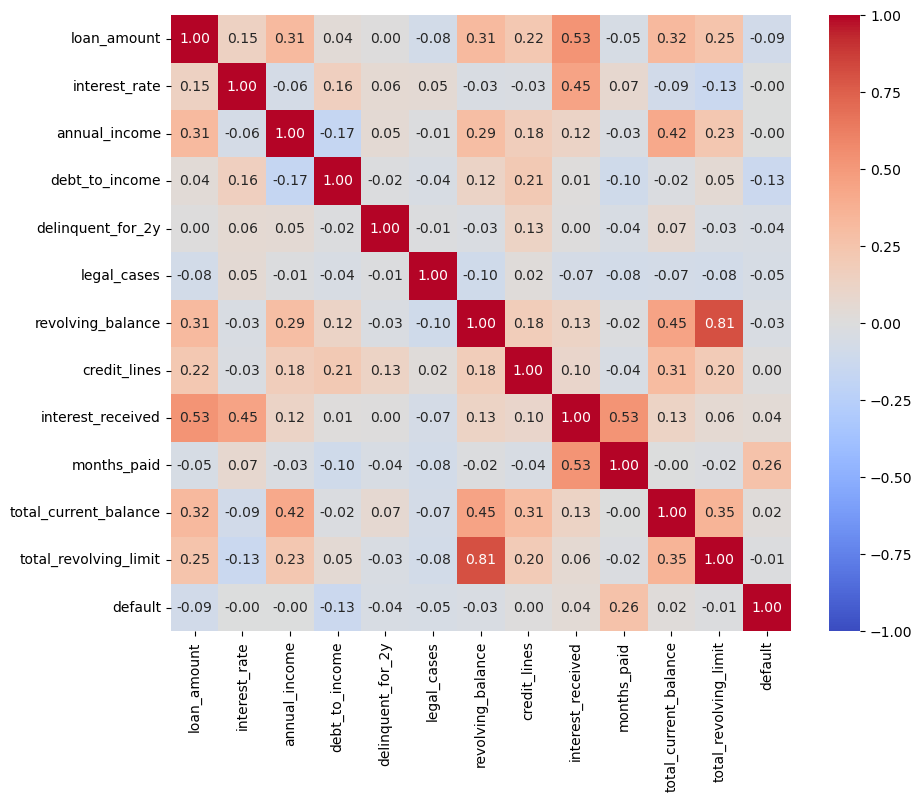

total_revolving_limit


In [32]:
corr=df.train.drop(['ID'],axis=1).select_dtypes(exclude=['object']).corr()

correlation_limit=0.75
too_correlated=list()
seen=set()
for x in corr.columns:
    for y in corr.index:
        seen.add((y,x))
        if (x,y) not in seen:
            if abs(corr[x][y])>correlation_limit:
                too_correlated.append(y)
del seen

plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()
for c in too_correlated:
    print(c)

---
---

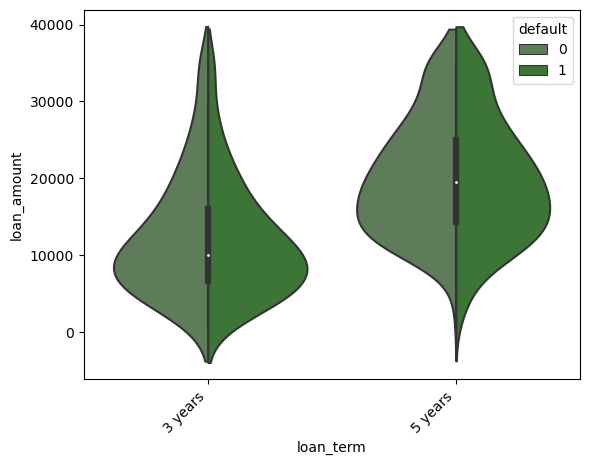

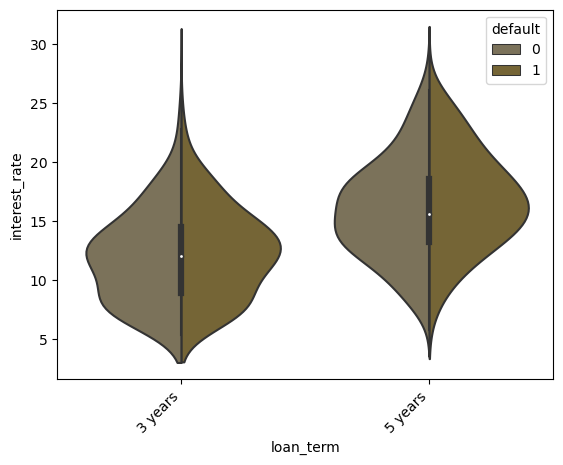

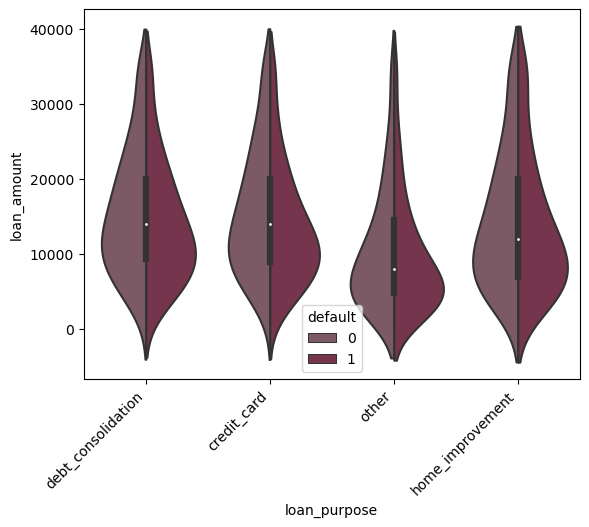

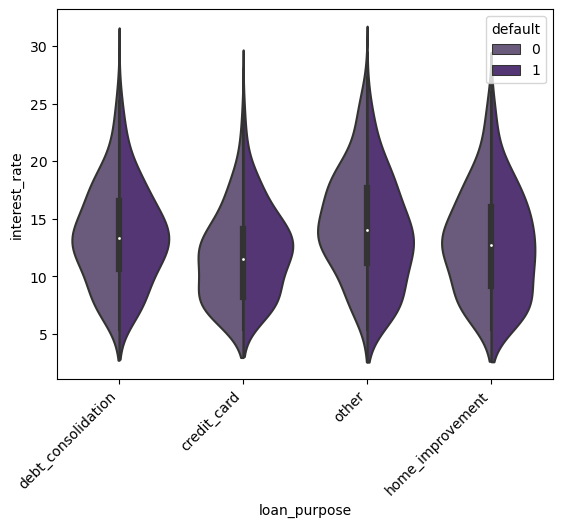

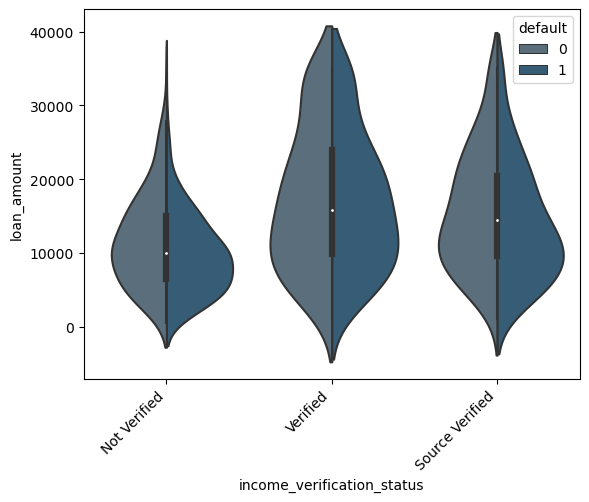

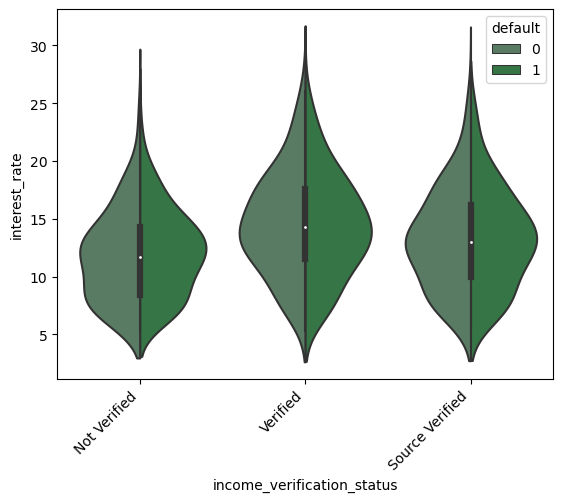

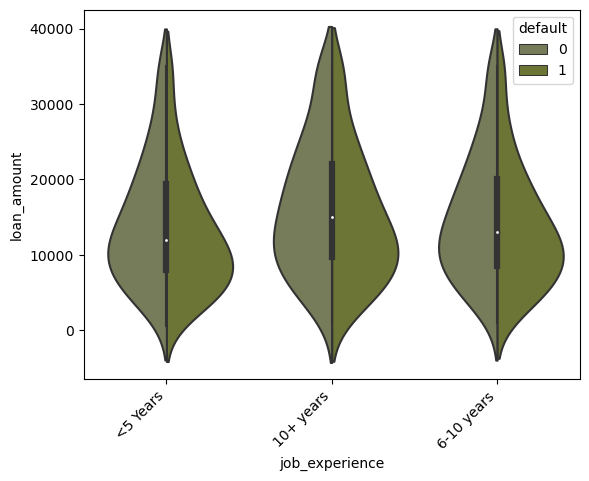

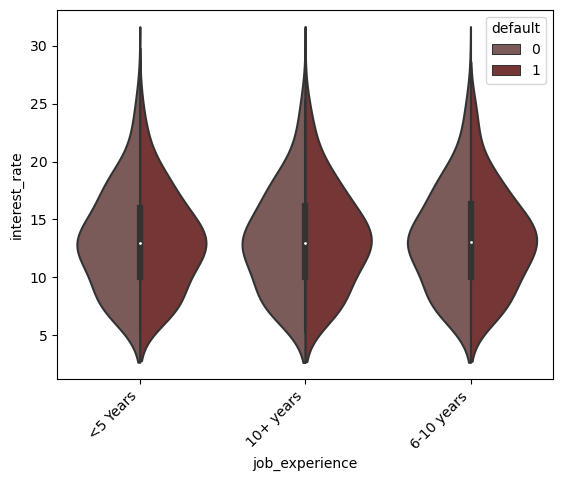

In [33]:
v1s=['loan_term', 'loan_purpose', 'income_verification_status', 'job_experience']
v2s=['loan_amount', 'interest_rate']
v3='default'

def mk_colour_patches(n):
    v=0.5
    return (
    '#'+(''.join(f'{value:02x}'
             for value in (np.array(colorsys.hsv_to_rgb(h,s,v))*255).round().astype(dtype=np.uint8)))
                for h in np.linspace(0,1,n, endpoint=False)*1.5
                for s in [2/3,1/3] )
        

sep=' 🙼 '
mkjumptable('bivariant', [f'{v1}{sep}{v2}' for v1 in v1s for v2 in v2s ])

colour_patches=list(mk_colour_patches(len(v1s)*len(v2s)))
for v1 in v1s:
    for v2 in v2s:
        cp1,cp2=colour_patches.pop(), colour_patches.pop()
        placelabel('bivariant', f"{v1}{sep}{v2}", )
        
        plt.xticks(rotation=45, horizontalalignment='right')
        ax=sns.violinplot(data=df.train, x=v1, y=v2, hue=v3, split=True,
                       palette=[ cp1,cp2 ], cut=1.5, bw=0.4) #, order=df.train['annual_income'].value_counts().index
        plt.show()

---
---

In [34]:
df.pltdata=df.train.drop(['ID'], axis=1).select_dtypes(include=['number'])

In [35]:
df_tmp=pd.DataFrame()
for col in df.pltdata.columns:
    firstQ,thirdQ=df.pltdata[col].quantile([.25,.75])
    iqr=thirdQ-firstQ
    sele=df.pltdata[col]<1.5*iqr+thirdQ
    if not sele.any():
        continue
#    print(col, sele)
    df_tmp[col]=sele
    
df_tmp.all(axis=1)

del firstQ,thirdQ,iqr,sele # ,df_tmp

In [36]:
#df.pltdata[df.train.public_records>8].public_records=8
df.pltdata['legal_cases'] = np.where(df.train['legal_cases'] < 8, df.train['legal_cases'], 8)

In [37]:
df.pltdata[df_tmp.all(axis=1)]

,loan_amount,interest_rate,annual_income,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,total_current_balance,total_revolving_limit,default
1,18000,13.65,64000.00,31.67,0.00,1.00,9783,24.00,3348.25,95.00,185433.00,13500.00,0
2,16000,7.26,150000.00,19.70,2.00,0.00,13641,27.00,276.69,13.00,180519.00,19300.00,0
3,25000,13.99,59800.00,37.39,0.00,0.00,35020,35.00,1106.72,17.00,183208.00,55400.00,0
5,10000,12.69,56000.00,16.16,0.00,1.00,6643,48.00,590.50,26.00,24054.00,25167.00,0
6,15000,11.14,100000.00,10.51,0.00,1.00,14088,14.00,1020.57,35.00,14519.00,15200.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93163,19000,5.32,120000.00,16.25,0.00,0.00,8712,18.00,467.14,26.00,220697.00,57200.00,0
93167,7800,12.29,21000.00,12.97,0.00,0.00,8197,8.00,479.81,31.00,93130.00,17200.00,0
93169,3200,7.26,85000.00,17.11,0.00,0.00,7924,38.00,55.34,13.00,64635.00,47600.00,0
93171,8000,13.98,148531.50,13.04,1.00,0.00,5391,25.00,1150.58,65.00,94596.00,6500.00,0


In [38]:
if 'printslow' in vars() and printslow:
    if 'warnings' in globals():
        warnings.filterwarnings('ignore', category=UserWarning, module='seaborn.axisgrid')
    sns.pairplot(data=df.pltdata[df_tmp.all(axis=1)], diag_kind="kde")
    plt.show()

In [39]:
if 'X' in df.__dict__:
    del df.X
if 'y' in df.__dict__:
    del df.y

In [40]:
df.y=df.train[dep_var]

In [41]:
dummyize=[
    'job_experience',
    'loan_grade',
    'loan_term',
    'income_verification_status',
    'loan_purpose',
    'application_type',
    'home_ownership',
]
drops=[
    dep_var,       # this is going into y
    'ID',            # id is unique and probably adds no value
    'state_code',    # will be converted to lat/long
    'loan_subgrade', # will be converted to number (integer)
]
df.X=df.train.drop(drops+too_correlated+dummyize, axis=1).copy().fillna(0)


In [42]:
df.X['longitude']=df.train['state_code'].apply(lambda x: state_centroids[x].longitude)
df.X['latitude']=df.train['state_code'].apply(lambda x: state_centroids[x].latitude)

In [43]:
nans=df.train.loc[:,df.train.isna().any()].isna().astype(np.int8)
nans.columns+='_nan'

In [44]:
assert not checkfornan(df.X),f"NaN values found in columns: {checkfornan(df.X)}"

In [45]:
df.X = pd.concat([df.X, nans], axis=1)
df.X

,loan_amount,interest_rate,annual_income,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,...,longitude,latitude,job_experience_nan,annual_income_nan,delinquent_for_2y_nan,legal_cases_nan,credit_lines_nan,months_paid_nan,total_current_balance_nan,total_revolving_limit_nan
0,9000,9.17,85000.00,26.68,0.00,0.00,39519,20.00,59.60,4.00,...,-109.63,47.05,0,0,0,0,0,0,0,0
1,18000,13.65,64000.00,31.67,0.00,1.00,9783,24.00,3348.25,95.00,...,-71.56,41.68,0,0,0,0,0,0,0,0
2,16000,7.26,150000.00,19.70,2.00,0.00,13641,27.00,276.69,13.00,...,-86.35,35.86,0,0,0,0,0,0,0,0
3,25000,13.99,59800.00,37.39,0.00,0.00,35020,35.00,1106.72,17.00,...,-94.31,46.28,1,0,0,0,0,0,0,0
4,17000,6.39,72000.00,8.92,0.00,0.00,23990,26.00,725.29,39.00,...,-86.35,35.86,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,3200,7.26,85000.00,17.11,0.00,0.00,7924,38.00,55.34,13.00,...,-82.45,28.63,0,0,0,0,0,0,0,0
93170,3500,5.42,57550.00,22.64,0.00,0.00,10174,24.00,299.67,161.00,...,-82.45,28.63,1,0,0,0,0,0,1,1
93171,8000,13.98,148531.50,13.04,1.00,0.00,5391,25.00,1150.58,65.00,...,-86.83,32.78,0,0,0,0,0,0,0,0
93172,35000,17.77,100000.00,17.22,0.00,0.00,24609,45.00,5764.58,56.00,...,-119.47,37.18,0,0,0,0,0,0,0,0


In [46]:
df.X

,loan_amount,interest_rate,annual_income,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,...,longitude,latitude,job_experience_nan,annual_income_nan,delinquent_for_2y_nan,legal_cases_nan,credit_lines_nan,months_paid_nan,total_current_balance_nan,total_revolving_limit_nan
0,9000,9.17,85000.00,26.68,0.00,0.00,39519,20.00,59.60,4.00,...,-109.63,47.05,0,0,0,0,0,0,0,0
1,18000,13.65,64000.00,31.67,0.00,1.00,9783,24.00,3348.25,95.00,...,-71.56,41.68,0,0,0,0,0,0,0,0
2,16000,7.26,150000.00,19.70,2.00,0.00,13641,27.00,276.69,13.00,...,-86.35,35.86,0,0,0,0,0,0,0,0
3,25000,13.99,59800.00,37.39,0.00,0.00,35020,35.00,1106.72,17.00,...,-94.31,46.28,1,0,0,0,0,0,0,0
4,17000,6.39,72000.00,8.92,0.00,0.00,23990,26.00,725.29,39.00,...,-86.35,35.86,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,3200,7.26,85000.00,17.11,0.00,0.00,7924,38.00,55.34,13.00,...,-82.45,28.63,0,0,0,0,0,0,0,0
93170,3500,5.42,57550.00,22.64,0.00,0.00,10174,24.00,299.67,161.00,...,-82.45,28.63,1,0,0,0,0,0,1,1
93171,8000,13.98,148531.50,13.04,1.00,0.00,5391,25.00,1150.58,65.00,...,-86.83,32.78,0,0,0,0,0,0,0,0
93172,35000,17.77,100000.00,17.22,0.00,0.00,24609,45.00,5764.58,56.00,...,-119.47,37.18,0,0,0,0,0,0,0,0


In [47]:
for colname in dummyize:
    all_colvals=df.train[colname].unique()
    for colval in all_colvals[1:]:
        df.X[f'{colname}_{colval}']=(df.train[colname]==colval).astype(np.int8)


In [48]:
df.X.columns

Index(['loan_amount', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinquent_for_2y', 'legal_cases', 'revolving_balance', 'credit_lines',
       'interest_received', 'months_paid', 'total_current_balance',
       'longitude', 'latitude', 'job_experience_nan', 'annual_income_nan',
       'delinquent_for_2y_nan', 'legal_cases_nan', 'credit_lines_nan',
       'months_paid_nan', 'total_current_balance_nan',
       'total_revolving_limit_nan', 'job_experience_10+ years',
       'job_experience_6-10 years', 'loan_grade_C', 'loan_grade_A',
       'loan_grade_E', 'loan_grade_D', 'loan_grade_F', 'loan_grade_G',
       'loan_term_5 years', 'income_verification_status_Verified',
       'income_verification_status_Source Verified',
       'loan_purpose_credit_card', 'loan_purpose_other',
       'loan_purpose_home_improvement', 'application_type_JOINT',
       'home_ownership_MORTGAGE', 'home_ownership_RENT', 'home_ownership_NONE',
       'home_ownership_OTHER'],
      dtype='object

In [49]:
df.X['loan_score']=df.train['loan_subgrade'].apply(lambda x:(ord(x[0])-ord('A'))*5+ord(x[1])-ord('1'))

In [50]:
df.X

,loan_amount,interest_rate,annual_income,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,...,income_verification_status_Source Verified,loan_purpose_credit_card,loan_purpose_other,loan_purpose_home_improvement,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_NONE,home_ownership_OTHER,loan_score
0,9000,9.17,85000.00,26.68,0.00,0.00,39519,20.00,59.60,4.00,...,0,0,0,0,0,0,0,0,0,6
1,18000,13.65,64000.00,31.67,0.00,1.00,9783,24.00,3348.25,95.00,...,0,0,0,0,0,0,0,0,0,10
2,16000,7.26,150000.00,19.70,2.00,0.00,13641,27.00,276.69,13.00,...,1,0,0,0,0,1,0,0,0,3
3,25000,13.99,59800.00,37.39,0.00,0.00,35020,35.00,1106.72,17.00,...,0,0,0,0,0,1,0,0,0,13
4,17000,6.39,72000.00,8.92,0.00,0.00,23990,26.00,725.29,39.00,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,3200,7.26,85000.00,17.11,0.00,0.00,7924,38.00,55.34,13.00,...,0,0,0,0,0,0,1,0,0,3
93170,3500,5.42,57550.00,22.64,0.00,0.00,10174,24.00,299.67,161.00,...,0,0,1,0,0,1,0,0,0,0
93171,8000,13.98,148531.50,13.04,1.00,0.00,5391,25.00,1150.58,65.00,...,1,1,0,0,0,0,1,0,0,12
93172,35000,17.77,100000.00,17.22,0.00,0.00,24609,45.00,5764.58,56.00,...,0,0,0,0,0,0,1,0,0,15


<Axes: xlabel='loan_score', ylabel='Count'>

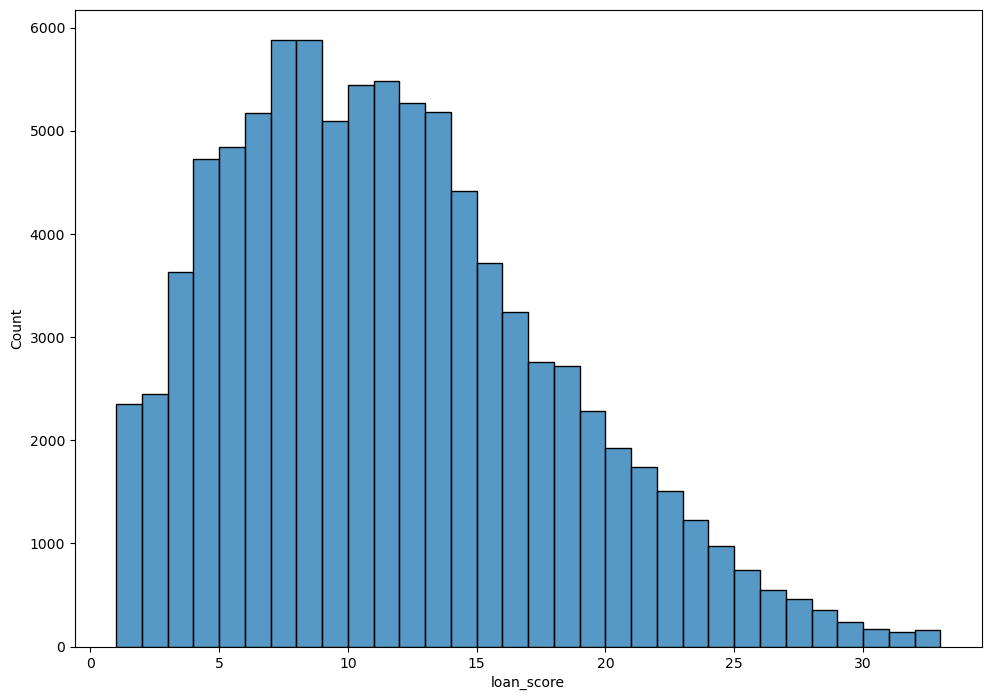

In [51]:
fig, ax = plt.subplots(figsize=dims)

sns.histplot(df.X, x='loan_score', ax=ax, bins=
             range(df.X['loan_score'].min()+1,
df.X['loan_score'].max()
)
             )
#sns.histplot(df.X, x='loan_score', ax=ax, bins=np.sort(df.X['loan_score'].unique()))

In [52]:
df.X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   loan_amount                                 93174 non-null  int64  
 1   interest_rate                               93174 non-null  float64
 2   annual_income                               93174 non-null  float64
 3   debt_to_income                              93174 non-null  float64
 4   delinquent_for_2y                           93174 non-null  float64
 5   legal_cases                                 93174 non-null  float64
 6   revolving_balance                           93174 non-null  int64  
 7   credit_lines                                93174 non-null  float64
 8   interest_received                           93174 non-null  float64
 9   months_paid                                 93174 non-null  float64
 10  total_curr

In [53]:
df.X

,loan_amount,interest_rate,annual_income,debt_to_income,delinquent_for_2y,legal_cases,revolving_balance,credit_lines,interest_received,months_paid,...,income_verification_status_Source Verified,loan_purpose_credit_card,loan_purpose_other,loan_purpose_home_improvement,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_NONE,home_ownership_OTHER,loan_score
0,9000,9.17,85000.00,26.68,0.00,0.00,39519,20.00,59.60,4.00,...,0,0,0,0,0,0,0,0,0,6
1,18000,13.65,64000.00,31.67,0.00,1.00,9783,24.00,3348.25,95.00,...,0,0,0,0,0,0,0,0,0,10
2,16000,7.26,150000.00,19.70,2.00,0.00,13641,27.00,276.69,13.00,...,1,0,0,0,0,1,0,0,0,3
3,25000,13.99,59800.00,37.39,0.00,0.00,35020,35.00,1106.72,17.00,...,0,0,0,0,0,1,0,0,0,13
4,17000,6.39,72000.00,8.92,0.00,0.00,23990,26.00,725.29,39.00,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,3200,7.26,85000.00,17.11,0.00,0.00,7924,38.00,55.34,13.00,...,0,0,0,0,0,0,1,0,0,3
93170,3500,5.42,57550.00,22.64,0.00,0.00,10174,24.00,299.67,161.00,...,0,0,1,0,0,1,0,0,0,0
93171,8000,13.98,148531.50,13.04,1.00,0.00,5391,25.00,1150.58,65.00,...,1,1,0,0,0,0,1,0,0,12
93172,35000,17.77,100000.00,17.22,0.00,0.00,24609,45.00,5764.58,56.00,...,0,0,0,0,0,0,1,0,0,15


In [54]:
print(df.X.dtypes)

loan_amount                                     int64
interest_rate                                 float64
annual_income                                 float64
debt_to_income                                float64
delinquent_for_2y                             float64
legal_cases                                   float64
revolving_balance                               int64
credit_lines                                  float64
interest_received                             float64
months_paid                                   float64
total_current_balance                         float64
longitude                                     float64
latitude                                      float64
job_experience_nan                               int8
annual_income_nan                                int8
delinquent_for_2y_nan                            int8
legal_cases_nan                                  int8
credit_lines_nan                                 int8
months_paid_nan             

In [55]:
colour_patches=('#'+(''.join(f'{value:02x}' for value in (np.array(colorsys.hsv_to_rgb(h,s,0.5))*255).round().astype(dtype=np.uint8))) for h in [0.0,.25,.5,.75] for s in [2/3,1/3] )

In [56]:
IPython.display.HTML('\n'.join(
    [f'<div style="width:25px; height:25px; background-color:{colour_patch};display:inline-block"></div>'
        for colour_patch in colour_patches]))

In [57]:
def markstartof(my_marker):
    html=IPython.display.HTML(f'<a id="{my_marker}"></a><h2>{my_marker}</h2>')
    IPython.display.display(html)

In [58]:
df.X_train, df.X_test, df.y_train, df.y_test = sklearn.model_selection.train_test_split(df.X, df.y, test_size=0.4, random_state=1)

In [59]:
models=dict()
scores=dict()

In [75]:
score=collections.namedtuple( 'score',
    [
    'accuracy',
    'recall',
    'precision',
    'f1',
    'roc_auc'
    ])


In [76]:
def mkscore(pred, y):
    metrics=(sklearn.metrics.__getattribute__(f'{sc}_{score.__name__}')(y, pred) for sc in score._fields)
    return score(*metrics)

def plot_confusion(y, ŷ):
    cm = sklearn.metrics.confusion_matrix(y, ŷ)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [77]:
def tree_graph(model, feature_names, fix_arrows=False):
    plt.figure(figsize=(20, 60))
    out = sklearn.tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=True,
        class_names=True,
    )
    if not fix_arrows:
        return
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

In [78]:
feature_names = list(df.X_test)
print(feature_names)

['loan_amount', 'interest_rate', 'annual_income', 'debt_to_income', 'delinquent_for_2y', 'legal_cases', 'revolving_balance', 'credit_lines', 'interest_received', 'months_paid', 'total_current_balance', 'longitude', 'latitude', 'job_experience_nan', 'annual_income_nan', 'delinquent_for_2y_nan', 'legal_cases_nan', 'credit_lines_nan', 'months_paid_nan', 'total_current_balance_nan', 'total_revolving_limit_nan', 'job_experience_10+ years', 'job_experience_6-10 years', 'loan_grade_C', 'loan_grade_A', 'loan_grade_E', 'loan_grade_D', 'loan_grade_F', 'loan_grade_G', 'loan_term_5 years', 'income_verification_status_Verified', 'income_verification_status_Source Verified', 'loan_purpose_credit_card', 'loan_purpose_other', 'loan_purpose_home_improvement', 'application_type_JOINT', 'home_ownership_MORTGAGE', 'home_ownership_RENT', 'home_ownership_NONE', 'home_ownership_OTHER', 'loan_score']


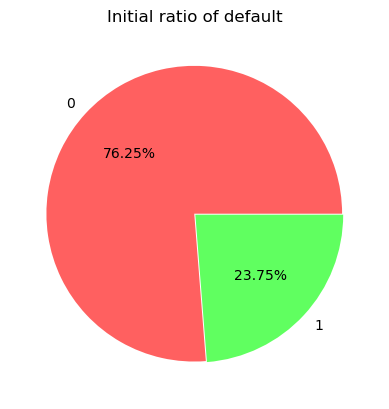

In [79]:
counts=df.train[dep_var].value_counts()
plt.title(f'Initial ratio of {dep_var}')
plt.pie(counts, labels=counts.index, autopct=lambda x:f'{x:.2f}%', colors=['#ff6060','#60ff60'], explode=[0.005,.005])
plt.show()

DecisionTreeClassifier(random_state=1)

score(accuracy=0.7823718808693318, recall=0.5667804323094425, precision=0.5365643511039311, f1=0.5512586445366529, roc_auc=0.7078459745816876)


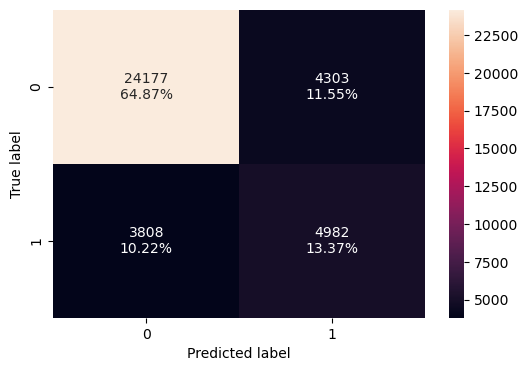

BaggingClassifier(random_state=1)

score(accuracy=0.8517842768983096, recall=0.4987485779294653, precision=0.7968011632133769, f1=0.6134900643716764, roc_auc=0.7297464799759686)


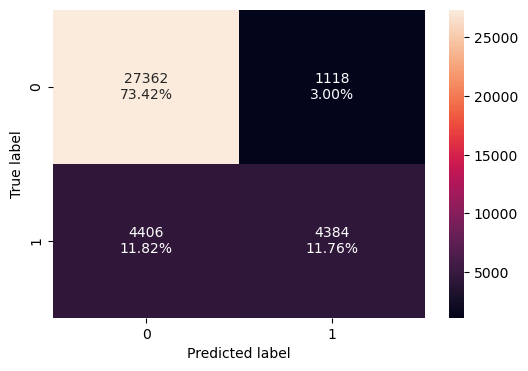

RandomForestClassifier(random_state=1)

score(accuracy=0.8275288435739201, recall=0.32992036405005687, precision=0.8435136707388017, f1=0.474321229964017, roc_auc=0.6555149573059272)


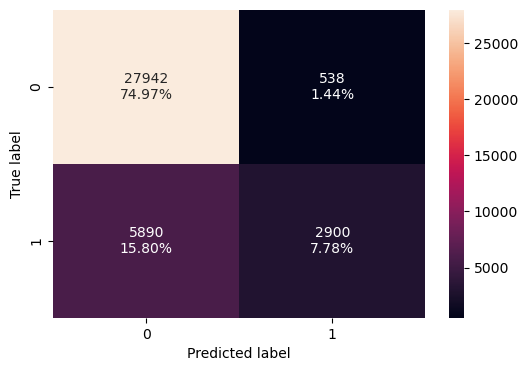

GradientBoostingClassifier(random_state=1)

score(accuracy=0.8309095787496646, recall=0.3502844141069397, precision=0.8389645776566758, f1=0.4942215088282504, roc_auc=0.6647665048062789)


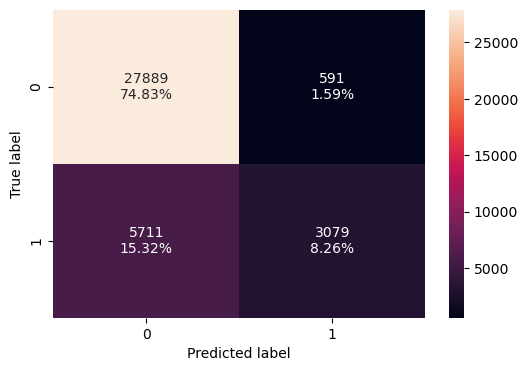

AdaBoostClassifier(random_state=1)

score(accuracy=0.8198819425811644, recall=0.3078498293515358, precision=0.8113943028485757, f1=0.4463505154639176, roc_auc=0.6428820775971164)


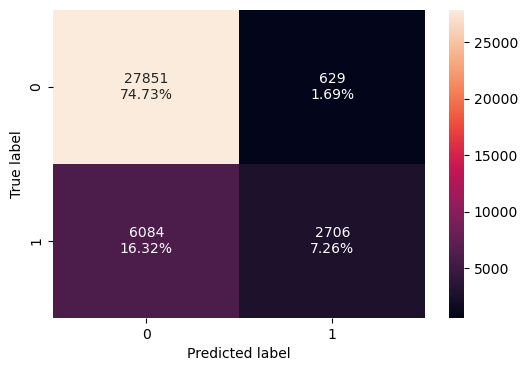

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

score(accuracy=0.8752079420445399, recall=0.6022753128555176, precision=0.8209024654985269, f1=0.6947962464728656, roc_auc=0.7808602687873093)


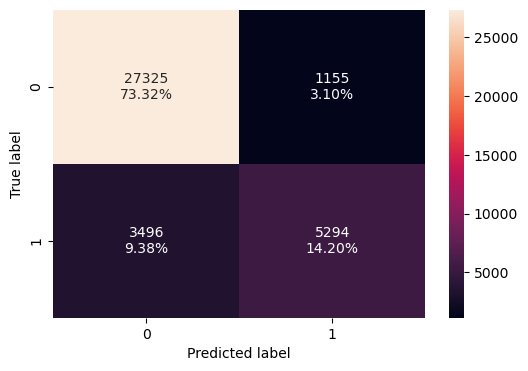

In [80]:
scores=dict()
ŷs=dict()
random_state=1
input_models = [
        sklearn.tree.DecisionTreeClassifier(random_state=random_state),
        sklearn.ensemble.BaggingClassifier(random_state=random_state),
        sklearn.ensemble.RandomForestClassifier(random_state=random_state),
        sklearn.ensemble.GradientBoostingClassifier(random_state=random_state),
        sklearn.ensemble.AdaBoostClassifier(random_state=random_state),
        xgboost.XGBClassifier(random_state=random_state, eval_metric="logloss")
      ]

mkjumptable('model', [type(model).__name__ for model in input_models]) # add patches

for model in input_models:
    mname=type(model).__name__
    placelabel('model', mname)
    model.fit(df.X_train, df.y_train)
    IPython.display.display(model)
    ŷs[mname] = model.predict(df.X_test)
    sc=mkscore(ŷs[mname], df.y_test)
    print(sc)
    scores[mname]=sc
    plot_confusion(df.y_test, ŷs[mname])
    
#    if 'printslow' in vars() and printslow:
#    tree_graph(model, feature_names)
# Can't do this on all types; do we want to do this (or something else) as appropriate?



In [82]:
pd.DataFrame.from_dict(scores, orient='index')

,accuracy,recall,precision,f1,roc_auc
DecisionTreeClassifier,0.78,0.57,0.54,0.55,0.71
BaggingClassifier,0.85,0.50,0.80,0.61,0.73
RandomForestClassifier,0.83,0.33,0.84,0.47,0.66
GradientBoostingClassifier,0.83,0.35,0.84,0.49,0.66
AdaBoostClassifier,0.82,0.31,0.81,0.45,0.64
XGBClassifier,0.88,0.60,0.82,0.69,0.78


In [83]:
rus = imblearn.under_sampling.RandomUnderSampler(random_state=0, replacement=True)

df.X_resampled, df.y_resampled = rus.fit_resample(df.X_train, df.y_train)

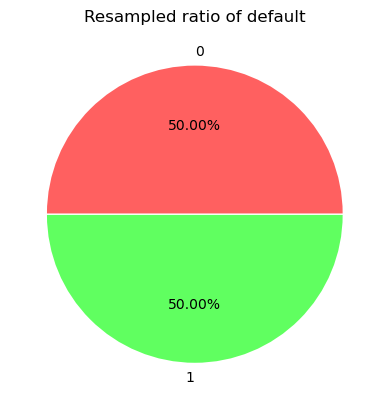

In [87]:
counts=df.y_resampled.value_counts()
plt.title(f'Resampled ratio of {dep_var}')
plt.pie(counts, labels=counts.index, autopct=lambda x:f'{x:.2f}%', colors=['#ff6060','#60ff60'], explode=[0.005,.005])
plt.show()

DecisionTreeClassifier(random_state=1)

score(accuracy=0.6675073785886773, recall=0.7072810011376565, precision=0.3876901970566226, f1=0.5008458873761379, roc_auc=0.6812563713553451)


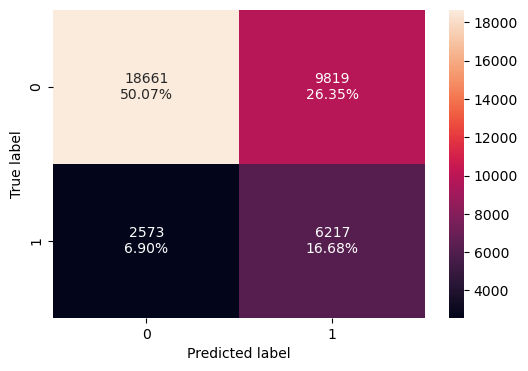

BaggingClassifier(random_state=1)

score(accuracy=0.7943654413737591, recall=0.7006825938566553, precision=0.5503037884203003, f1=0.6164548093283956, roc_auc=0.7619810441193391)


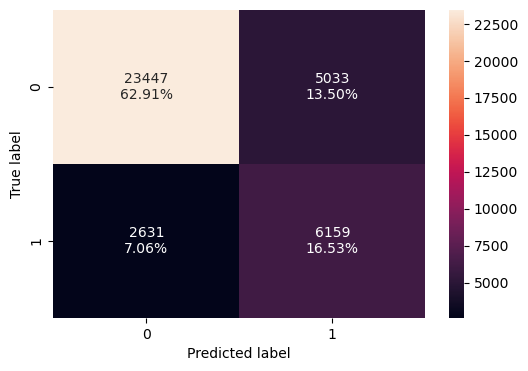

RandomForestClassifier(random_state=1)

score(accuracy=0.7504158840890797, recall=0.7212741751990899, precision=0.4805942995755003, f1=0.5768355927577109, roc_auc=0.7403421437793203)


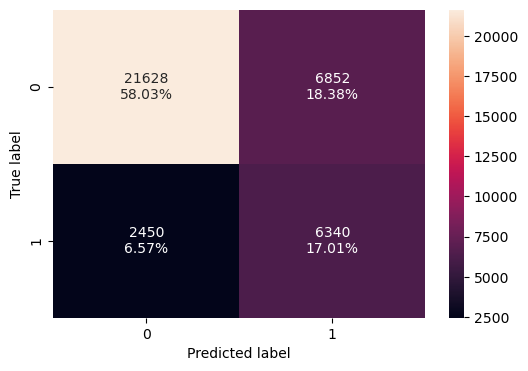

GradientBoostingClassifier(random_state=1)

score(accuracy=0.7857526160450765, recall=0.7036405005688282, precision=0.5348032857760484, f1=0.6077130926062393, roc_auc=0.7573680030934028)


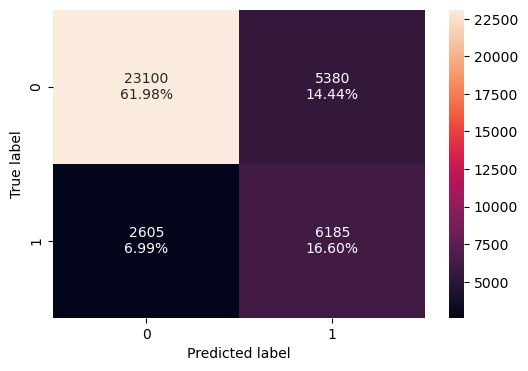

AdaBoostClassifier(random_state=1)

score(accuracy=0.7495841159109203, recall=0.6502844141069397, precision=0.4773277661795407, f1=0.550541777028654, roc_auc=0.7152580778399868)


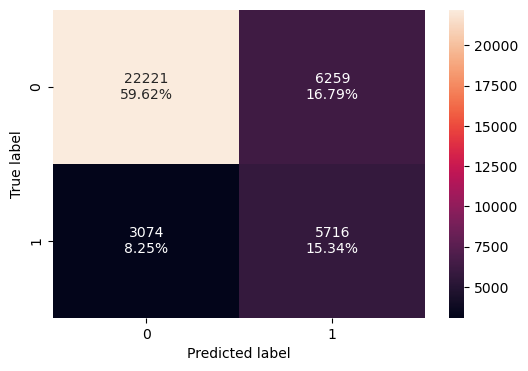

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

score(accuracy=0.8425006707807888, recall=0.7952218430034129, precision=0.6320072332730561, f1=0.7042821158690177, roc_auc=0.8261572698163133)


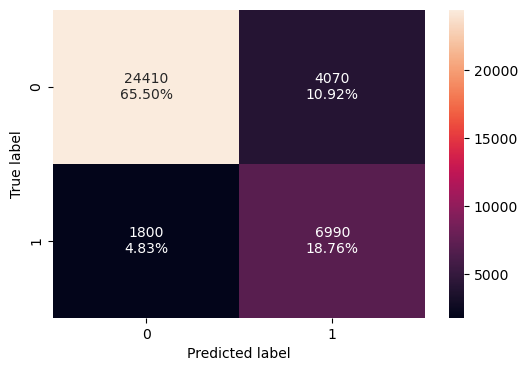

In [90]:
#orig_models=input_models
#del input_models
if 'scores' not in globals():
    scores=dict()
if 'ŷs' not in globals():
    ŷs=dict()
random_state=1
input_models_urdersample = [
        sklearn.tree.DecisionTreeClassifier(random_state=random_state),
        sklearn.ensemble.BaggingClassifier(random_state=random_state),
        sklearn.ensemble.RandomForestClassifier(random_state=random_state),
        sklearn.ensemble.GradientBoostingClassifier(random_state=random_state),
        sklearn.ensemble.AdaBoostClassifier(random_state=random_state),
        xgboost.XGBClassifier(random_state=random_state, eval_metric="logloss")
      ]

mkjumptable('model', [type(model).__name__+'_undersampling' for model in input_models_urdersample]) # add patches

for model in input_models_urdersample:
    mname=type(model).__name__+'_undersampling'
    placelabel('model', mname)
    model.fit(df.X_resampled, df.y_resampled)   # Haha!
    IPython.display.display(model)
    
    ŷs[mname] = model.predict(df.X_test)
    sc=mkscore(ŷs[mname], df.y_test)
    print(sc)
    scores[mname]=sc
    plot_confusion(df.y_test, ŷs[mname])
    
#    if 'printslow' in vars() and printslow:
#    tree_graph(model, feature_names)
# Can't do this on all types; do we want to do this (or something else) as appropriate?



In [86]:
pd.DataFrame.from_dict(scores, orient='index')

,accuracy,recall,precision,f1,roc_auc
DecisionTreeClassifier,0.78,0.57,0.54,0.55,0.71
BaggingClassifier,0.85,0.50,0.80,0.61,0.73
RandomForestClassifier,0.83,0.33,0.84,0.47,0.66
GradientBoostingClassifier,0.83,0.35,0.84,0.49,0.66
AdaBoostClassifier,0.82,0.31,0.81,0.45,0.64
XGBClassifier,0.88,0.60,0.82,0.69,0.78
DecisionTreeClassifier_undersampling,0.67,0.71,0.39,0.50,0.68
BaggingClassifier_undersampling,0.79,0.70,0.55,0.62,0.76
RandomForestClassifier_undersampling,0.75,0.72,0.48,0.58,0.74
GradientBoostingClassifier_undersampling,0.79,0.70,0.53,0.61,0.76
